In [1]:
'''
    Run this notebook for creating all models
    
'''
%load_ext autoreload

import os
import sys
sys.path.append("../..")  #Path to data directory
import pandas as pd
import collections
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# from sklearn.impute import SimpleImputer

from sklearn.utils import resample
# from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Added below imports to disable some warnings
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)

from src.model_prep import *
from src.data_constants import *

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# House Keeping

In [2]:
# Python library yellowbrick is used for multi-class visualization
#pip install yellowbrick

# Business Understanding
Botnet-powered distributed denial of service (DDoS) attacks have used infected IoT devices to bring down websites. IoT devices can also be used to direct other attacks. For instance, there may be future attempts to weaponize IoT devices. A possible example would be a nation shutting down home thermostats in an enemy state during a harsh winter.

In response, network intrusion detection systems have been developed to detect suspicious network activity. Routers are trained to identify cyber threats.

This project will predict  Machine Learning models to detect Botnet attacks on IoT devices

Datasets available in UCI.
https://archive.ics.uci.edu/ml/datasets/detection_of_IoT_botnet_attacks_N_BaIoT#
https://archive.ics.uci.edu/ml/machine-learning-databases/00442/


# Data Preparation

### Exploring observation data:
```
Combined observations from all traffic types and devices have 7574739 observations. Data preparation is done through device class object instatiation time when you call IoT_Device method in src/model_prep.py.

Data preparation is done at IoT_Device class object initiation time.
1) Loading 95 datasets ( 5 benign datasets and 10 malware datasets for each IoT device) in to a dataframe 
2) Create targeg variable 'Class' to identify benign, mirai and gafgyt data
3) All Mirai and gafyt malware data is combined in to their respective dataframe.
4) To avoid class imbalance, a new dataset is created with equal benign, mirai, and gafgyt data.
5) Combined dataframe is split to features and target data into X and y.
6) Data is stored in the class itself and pickled for future use to avoid redoint the above steps

For the Samsung Webcam, there was no Mirai attack data, so assume that Mirai didn't infect these cameras. Between the three type of traffics --benign, mirai, and bashlite-- you will notice a class imbalance. Although for cyber attack like these, typically you will expect a lot of threat records compared to normal traffic, however it depends on number of devices infected. 
```

<p align="center">
  <img width="800" height="800" src="../../visualization/images/data_explore.jpeg">
</p>


## Devices list
Dataset from UCI were collected from 9 IoT Devices in 3 categories listed below.
For each device, data is organized under type of attack (Benign, Mirai, Bashlite). 
Benign traffic is normal traffic which are not attacked by botnet malware.
Mirai and Bashlite are two types of malware attacking these iot devices.
For the putpose of this project, the botnet name Gyfgyt and Bashlite are used interchangeably. 
For each device the following data is collcted.
- 1) Benign data
- 2) Mirai Malware Threat
- 3) Gyfgyt Malware Threat

In [3]:
# List of all IoT devices for which data was collcted
device_list = list_iot_devices()

_______________   ________________________________________  ______                                                      
Decice Category   Device                                    Number                                                      
_______________   ________________________________________  ______                                                      
Door_Bell         Damini_Doorbell                           1                                                           
Door_Bell         Ennino_Doorbell                           2                                                           
Thermostats       Ecobee_Thermostat                         1                                                           
Baby_Monitor      Philips_B120N10_Baby_Monitor              1                                                           
Security_Camera   Provision_PT_737E_Security_Camera         1                                                           
Security_Camera   Provision_PT_8

## Running Models 
> Because of large datasets, I will read all data files once in a class instance and **pickle** the dataset to avoid reading several times.

> For each device I will run number of models to predict malware attacks.

> As a first step, run models for one devic **Damini Doorbell**

> Following models are run for comparision
> 1. DummyClassifier (Typically favors majority of the class)
> 2. Logistic Regression - FSM (Use all data - no train/test split and use defaults)
> 3. Logistic Regression       (30% test data is held. Remaining 70% data is split to train and validation)
> 4. KNeighborsClassifie       (    ,,   )
> 5. RandomForestClassifier    ( ,, ) -> Computationally expensive, so not running it all the time.
> 6. XGBClassifier             (,, )

### Model Evaluation
> A malware attack is consequential to the network and cyber security threat to consumers and business alike. <BR>
> I will use **Recall** as the primary method to evaluate the model to reduce Type-II error. Also, overall **Accuracy** is considered

## For each device we will run number of models to predict malware attacks.

## 1) Device: Damini_Doorbell

 
> Instantiate class IoT_Device.<BR>
1) Call ** read_device_pickle** to deserialize iot class object if a pickle file exis and revive the class instance to iot<BR>
2) If a pickle file aready exist, prompt is given whether to create it again.<BR>
3) If no pickle file exisits, instantiate an object by calling **IoT_Device** and write it to a new **pickle** file

In [5]:
# Read the pickle file or intantiate IoT_Device
damini_iot = read_device_pickle(DAMINI_DOORBELL)   

# If the file doesn't exist or request to recreat, instantiate and write the pickle file
if damini_iot == None:
    # Instantiate class IoT_Device
    damini_iot = IoT_Device(DAMINI_DOORBELL)
    
    #Pickle the object
    write_device_pickle(damini_iot, DAMINI_DOORBELL)

../../data_prep/Damini_Doorbell.pkl already created. Do you want to recreate it?(y/n):  



Input yes or no


../../data_prep/Damini_Doorbell.pkl already created. Do you want to recreate it?(y/n): n



Loading  ../../data_prep/Damini_Doorbell.pkl


### Model 0: Dummmy Model
> Dummy model will most likely favor the majority class

In [6]:
damini_iot.iot_Model("DummyClassifier")

              precision    recall  f1-score   support

           0      0.332     0.331     0.331     49548
           1      0.335     0.337     0.336     49548
           2      0.334     0.333     0.334     49548

    accuracy                          0.334    148644
   macro avg      0.334     0.334     0.334    148644
weighted avg      0.334     0.334     0.334    148644


 [0] Dummy Model: Raw Input Data--cross_val_score- [0.33448821 0.33539641 0.33223452 0.32900535 0.33520587]

***** [Damini_Doorbell] [Test Data] DummyClassifier *****

              precision    recall  f1-score   support

           0      0.332     0.331     0.331     49548
           1      0.335     0.337     0.336     49548
           2      0.334     0.333     0.334     49548

    accuracy                          0.334    148644
   macro avg      0.334     0.334     0.334    148644
weighted avg      0.334     0.334     0.334    148644



> Model pretty much pickedup all the values in the respective classes as benign traffic <BR>
> Now lets run a LogisticRegression with pretty much

### Model 1: FSM LogisticRegression
> Now lets run a LogisticRegression model with pretty much all defaults with out split

In [7]:
# Run plain vanila FSM LogisticRegression model with all default inpts - binary target
damini_iot.iot_Model("FSM")

/Users/lalithap/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0      0.000     0.000     0.000     49548
           1      0.333     1.000     0.500     49548
           2      0.000     0.000     0.000     49548

    accuracy                          0.333    148644
   macro avg      0.111     0.333     0.167    148644
weighted avg      0.111     0.333     0.167    148644


***** [Damini_Doorbell] [Test Data] FSM-LogisticRegression *****

              precision    recall  f1-score   support

           0      0.000     0.000     0.000     49548
           1      0.333     1.000     0.500     49548
           2      0.000     0.000     0.000     49548

    accuracy                          0.333    148644
   macro avg      0.111     0.333     0.167    148644
weighted avg      0.111     0.333     0.167    148644




 [0] FSM Model: Raw Input Data--cross_val_score- [0.66362811 0.4396717  0.68660231 0.6618117  0.4534782 ]


### First Simple accuracy is low, though it appears recall score is 0.
> Prediction on benign traffic is low<BR>
> Even much lower or no Mirai atacks were identified<BR>
> More traffic was identified as infected with Gafgyt malware, which is incorrect.
    
> The traffic measurements for each of those devices will need scaling before we pick-up the right signals from the data.

## Model2: LogisticRegression -- Target = binary; Benign(=0), Mirai(=1), Gafgyt(=2)

- 1) Train-Test-Split with 30% test data
- 2) Scale the predictor dataset 
- 3) Fit LogisticRegression model with mostly default values and run cross_validation_score, confustion_matrix for train and test data.


***** [Damini_Doorbell] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.613     1.000     0.760     24336
           1      0.999     0.999     0.999     24195
           2      0.999     0.368     0.537     24304

    accuracy                          0.789     72835
   macro avg      0.870     0.789     0.766     72835
weighted avg      0.870     0.789     0.765     72835



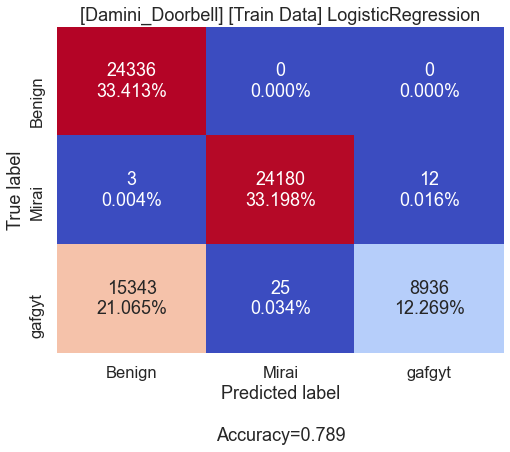


***** [Damini_Doorbell] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.613     1.000     0.760     10391
           1      0.999     0.999     0.999     10355
           2      0.996     0.371     0.541     10469

    accuracy                          0.789     31215
   macro avg      0.869     0.790     0.766     31215
weighted avg      0.869     0.789     0.766     31215




***** [Damini_Doorbell] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.614     1.000     0.761     14821
           1      0.999     0.999     0.999     14998
           2      0.999     0.369     0.539     14775

    accuracy                          0.791     44594
   macro avg      0.871     0.789     0.766     44594
weighted avg      0.871     0.791     0.768     44594



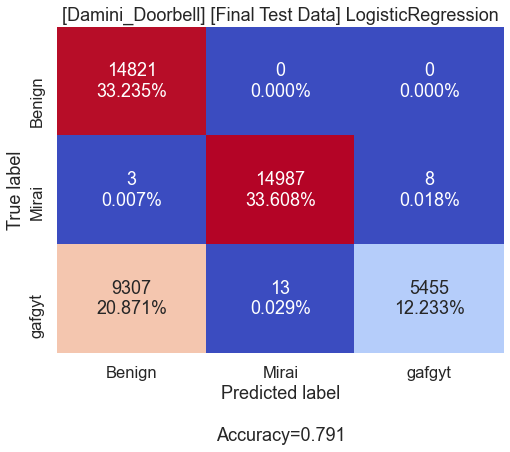

In [8]:
# Run plain vanila FSM LogisticRegression model with all default inpts - binary target
damini_iot.iot_Model("LogisticRegression")

In [9]:
import collections
print("      Train: ",collections.Counter(damini_iot.lg_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.lg_val_prediction))
print("       Test: ", collections.Counter(damini_iot.lg_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))

      Train:  Counter({0: 39682, 1: 24205, 2: 8948})
 Validation:  Counter({0: 16961, 1: 10352, 2: 3902})
       Test:  Counter({0: 24131, 1: 15000, 2: 5463})
      Label:  Counter({1: 14998, 0: 14821, 2: 14775})


> Looks very good. 2.73% False Negatives nad 0.05% False positives <BR>
> Gafgyt traffic's are identified more accurately than the Mirai attaks.<BR>
> Overall Accuracy of 0.972, Type 1 errors (false positives)0.05%. <BR>


## Model 3: KNeighborsClassifier -- Target = binary; Benign(=0), Mirai(=1), Gafgyt(=2)
> After running this, found it is ccomuputationally very expensive
> It's Accuracy is lot lower than Logistic Regeression.


***** [Damini_Doorbell] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     24336
           1      1.000     1.000     1.000     24195
           2      1.000     0.999     0.999     24304

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835




***** [Damini_Doorbell] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10391
           1      1.000     1.000     1.000     10355
           2      1.000     1.000     1.000     10469

    accuracy                          1.000     31215
   macro avg      1.000     1.000     1.000     31215
weighted avg      1.000     1.000     1.000     31215



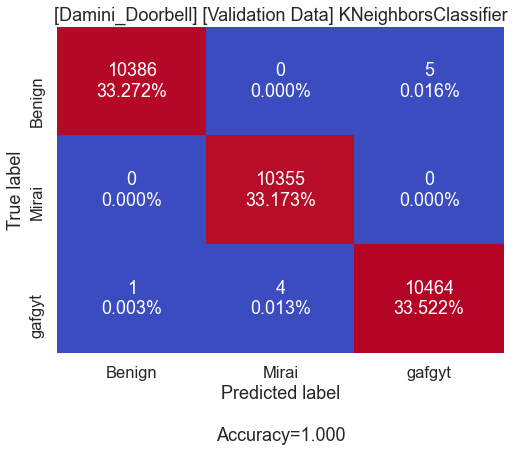


***** [Damini_Doorbell] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     14821
           1      0.999     1.000     1.000     14998
           2      1.000     0.999     0.999     14775

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



In [10]:
damini_iot.iot_Model("KNeighborsClassifier")

In [11]:
print("\n      Train: ",collections.Counter(damini_iot.knn_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.knn_val_prediction))
print("       Test: ", collections.Counter(damini_iot.knn_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({0: 24339, 2: 24294, 1: 24202})
 Validation:  Counter({2: 10469, 0: 10387, 1: 10359})
       Test:  Counter({1: 15004, 0: 14828, 2: 14762})
      Label:  Counter({1: 14998, 0: 14821, 2: 14775})






### Model 4: "DecisionTreeClassifier" -- Target = binary; Benign(=0), Mirai(=1), Gafgyt(=2)


***** [Damini_Doorbell] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     24336
           1      1.000     1.000     1.000     24195
           2      1.000     1.000     1.000     24304

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835



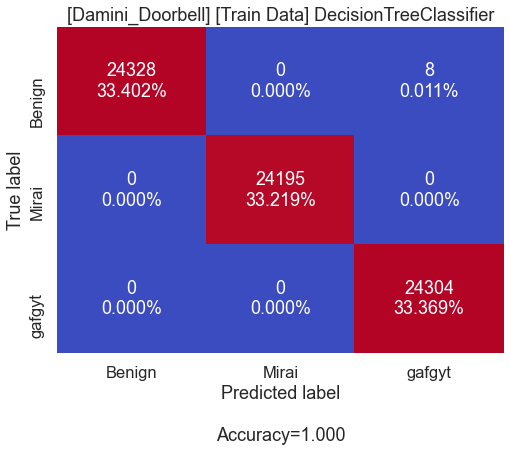


***** [Damini_Doorbell] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     10391
           1      1.000     1.000     1.000     10355
           2      0.999     1.000     0.999     10469

    accuracy                          1.000     31215
   macro avg      1.000     1.000     1.000     31215
weighted avg      1.000     1.000     1.000     31215



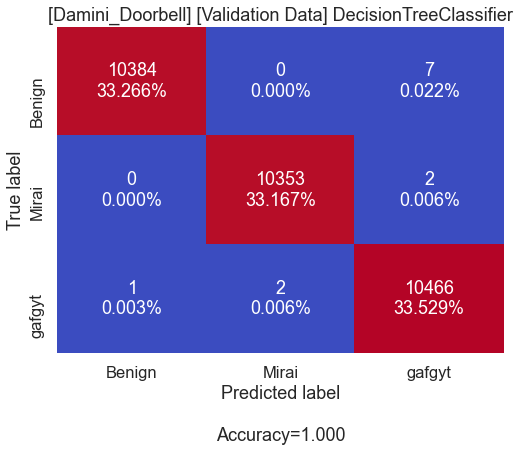


***** [Damini_Doorbell] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14821
           1      1.000     1.000     1.000     14998
           2      1.000     1.000     1.000     14775

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



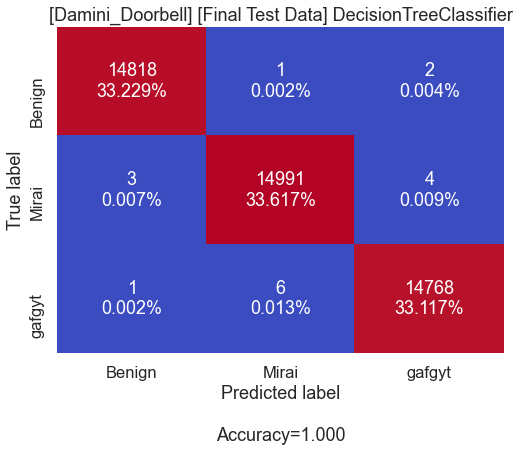

In [12]:
damini_iot.iot_Model("DecisionTreeClassifier")

In [13]:
print("\n      Train: ",collections.Counter(damini_iot.dt_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.dt_val_prediction))
print("       Test: ", collections.Counter(damini_iot.dt_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({0: 24328, 2: 24312, 1: 24195})
 Validation:  Counter({2: 10475, 0: 10385, 1: 10355})
       Test:  Counter({1: 14998, 0: 14822, 2: 14774})
      Label:  Counter({1: 14998, 0: 14821, 2: 14775})






## Model 4: RandomForestClassifier
> Run GridSearchcv with parameters { 'max_depth': [ 2, 5, 10 ], 'n_estimators': [ 100, 1000, 2000]}


***** [Damini_Doorbell] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     24336
           1      1.000     1.000     1.000     24195
           2      1.000     1.000     1.000     24304

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835



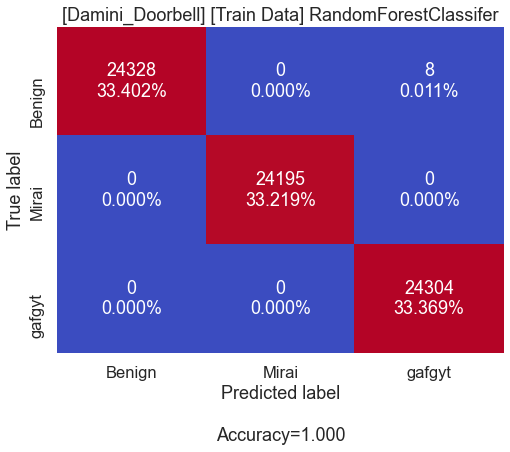


***** [Damini_Doorbell] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10391
           1      1.000     1.000     1.000     10355
           2      1.000     1.000     1.000     10469

    accuracy                          1.000     31215
   macro avg      1.000     1.000     1.000     31215
weighted avg      1.000     1.000     1.000     31215




***** [Damini_Doorbell] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14821
           1      1.000     1.000     1.000     14998
           2      1.000     1.000     1.000     14775

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



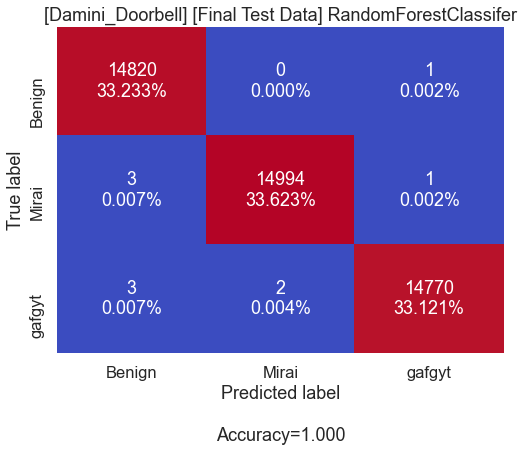

In [14]:
damini_iot.iot_Model("RandomForestClassifer")

In [15]:
print("\n      Train: ",collections.Counter(damini_iot.rfc_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.rfc_val_prediction))
print("       Test: ", collections.Counter(damini_iot.rfc_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({0: 24328, 2: 24312, 1: 24195})
 Validation:  Counter({2: 10473, 0: 10387, 1: 10355})
       Test:  Counter({1: 14996, 0: 14826, 2: 14772})
      Label:  Counter({1: 14998, 0: 14821, 2: 14775})






In [16]:
# damini_iot.iot_compare_recall_accuracy("KNeighborsClassifier")

# Model 5: XGBoost


***** [Damini_Doorbell] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     24336
           1      1.000     1.000     1.000     24195
           2      1.000     1.000     1.000     24304

    accuracy                          1.000     72835
   macro avg      1.000     1.000     1.000     72835
weighted avg      1.000     1.000     1.000     72835



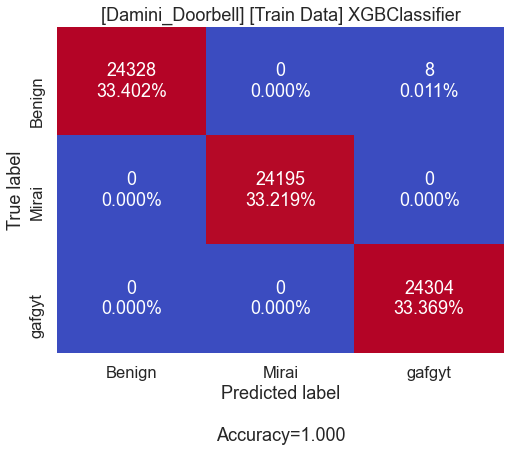


***** [Damini_Doorbell] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     10391
           1      1.000     1.000     1.000     10355
           2      0.999     1.000     1.000     10469

    accuracy                          1.000     31215
   macro avg      1.000     1.000     1.000     31215
weighted avg      1.000     1.000     1.000     31215



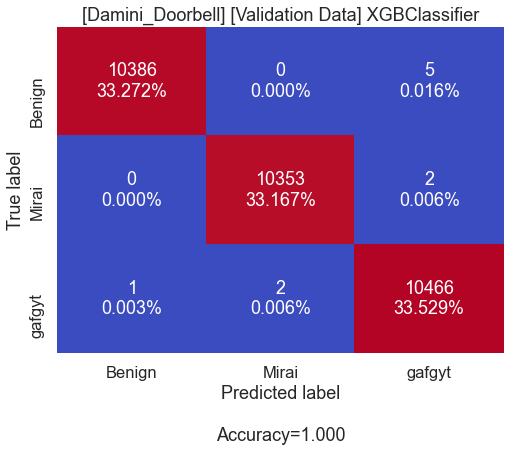


***** [Damini_Doorbell] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     14821
           1      1.000     1.000     1.000     14998
           2      1.000     0.999     1.000     14775

    accuracy                          1.000     44594
   macro avg      1.000     1.000     1.000     44594
weighted avg      1.000     1.000     1.000     44594



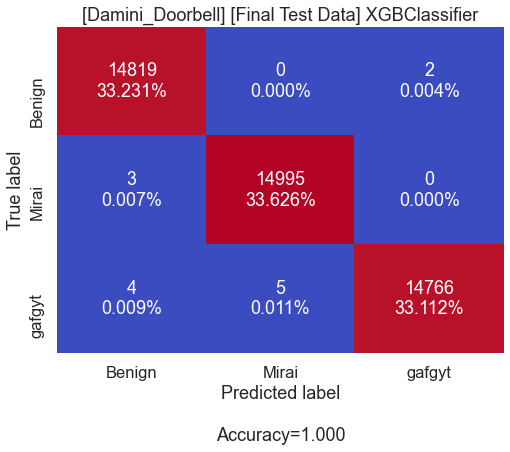

In [17]:
# XGBoost
damini_iot.iot_Model("XGBClassifier")

In [18]:
print("\n      Train: ",collections.Counter(damini_iot.xgb_train_prediction))
print(" Validation: ",collections.Counter(damini_iot.xgb_val_prediction))
print("       Test: ", collections.Counter(damini_iot.xgb_test_prediction))
print("      Label: ",collections.Counter(damini_iot.y_test))
print("\n\n\n")


      Train:  Counter({0: 24328, 2: 24312, 1: 24195})
 Validation:  Counter({2: 10473, 0: 10387, 1: 10355})
       Test:  Counter({1: 15000, 0: 14826, 2: 14768})
      Label:  Counter({1: 14998, 0: 14821, 2: 14775})






# 1) * Run LogisticalRegression, KNN, DecisionTree, RandomForest, and XGBoos for all 9 IoT devices

In [20]:
def model_factory(iot):
    '''
    Function: model_factory
    Input: class instantiated when IoT_Device class was instantiated - this correspond to requested IoT evice
    Action: Run all 5 models, print confusion matrix, print key statistics
    '''
    iot.iot_Model("LogisticRegression")
    print("      Train: ", collections.Counter(iot.lg_train_prediction))
    print(" Validation: ", collections.Counter(iot.lg_val_prediction))
    print("       Test: ", collections.Counter(iot.lg_test_prediction)) 
    print("      Label: ", collections.Counter(iot.lg_test_prediction)) 
    print("\n\n")

    iot.iot_Model("KNeighborsClassifier")
    print("      Train: ",collections.Counter(iot.knn_train_prediction))
    print(" Validation: ",collections.Counter(iot.knn_val_prediction))
    print("       Test: ", collections.Counter(iot.knn_test_prediction))  
    print("      Label: ", collections.Counter(iot.knn_test_prediction)) 
    print("\n\n")    
    
    iot.iot_Model("DecisionTreeClassifier")
    print("      Train: ",collections.Counter(iot.dt_train_prediction))
    print(" Validation: ",collections.Counter(iot.dt_val_prediction))
    print("       Test: ", collections.Counter(iot.dt_test_prediction))    
    print("      Label: ", collections.Counter(iot.dt_test_prediction)) 
    print("\n\n") 
    
    iot.iot_Model("RandomForestClassifer")
    print("      Train: ",collections.Counter(iot.rfc_train_prediction))
    print(" Validation: ",collections.Counter(iot.rfc_val_prediction))
    print("       Test: ", collections.Counter(iot.rfc_test_prediction))
    print("      Label: ",collections.Counter(iot.y_test))
    print("\n\n")
    
    iot.iot_Model("XGBClassifier")
    print("      Train: ",collections.Counter(iot.xgb_train_prediction))
    print(" Validation: ",collections.Counter(iot.xgb_val_prediction))
    print("       Test: ", collections.Counter(iot.xgb_test_prediction))
    print("      Label: ",collections.Counter(iot.y_test))
    print("\n\n")

# 2) *** Device: Ennino Doorbell ***
> Instantiate class IoT_Device.

>> Read datafiles and reate predictor and target data stored in the class
>> Call IoT_Device methods run predit models

Pickle file for Ennino Doorbell is already created.
Do you want to overwrite it? [Yes/No]
Ready to pickle the device ..  Shape: 117300
Pickled  ../../data_prep/Ennino_Doorbell.pkl

***** [Ennino_Doorbell] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.605     0.997     0.753     19168
           1      0.995     0.992     0.994     19203
           2      0.973     0.345     0.509     19106

    accuracy                          0.778     57477
   macro avg      0.858     0.778     0.752     57477
weighted avg      0.858     0.778     0.752     57477



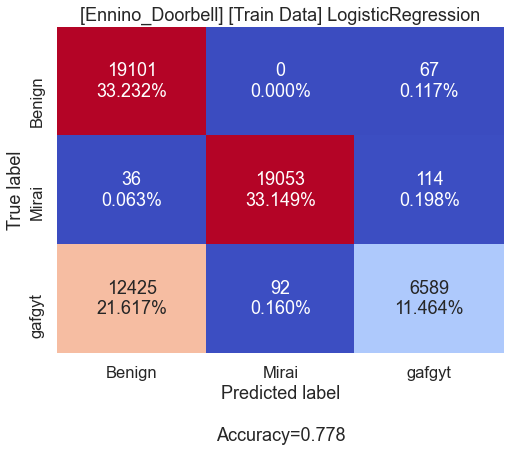


***** [Ennino_Doorbell] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.600     0.998     0.749      8188
           1      0.996     0.992     0.994      8174
           2      0.977     0.338     0.502      8271

    accuracy                          0.774     24633
   macro avg      0.857     0.776     0.748     24633
weighted avg      0.858     0.774     0.747     24633



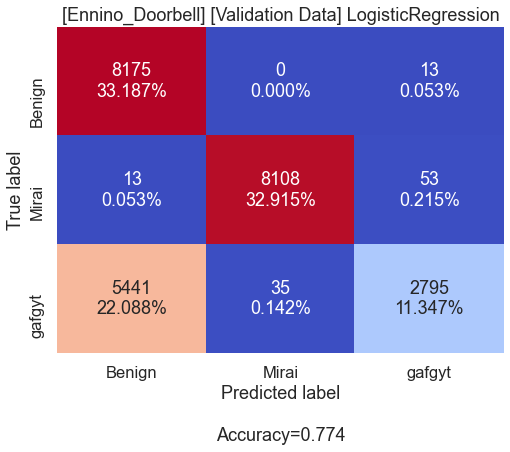


***** [Ennino_Doorbell] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.604     0.996     0.752     11744
           1      0.996     0.994     0.995     11723
           2      0.975     0.344     0.508     11723

    accuracy                          0.778     35190
   macro avg      0.858     0.778     0.752     35190
weighted avg      0.858     0.778     0.752     35190



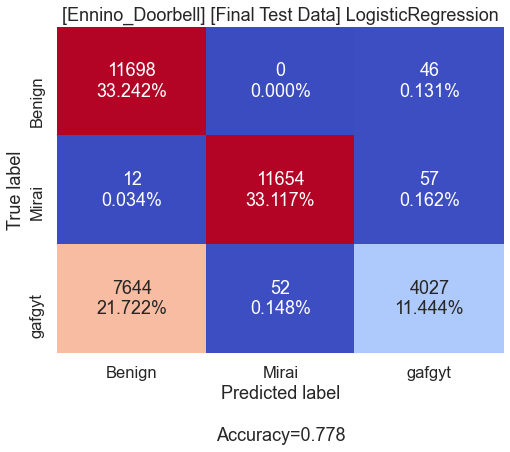

      Train:  Counter({0: 31562, 1: 19145, 2: 6770})
 Validation:  Counter({0: 13629, 1: 8143, 2: 2861})
       Test:  Counter({0: 19354, 1: 11706, 2: 4130})
      Label:  Counter({0: 19354, 1: 11706, 2: 4130})




***** [Ennino_Doorbell] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     19168
           1      0.999     1.000     1.000     19203
           2      0.999     0.999     0.999     19106

    accuracy                          0.999     57477
   macro avg      0.999     0.999     0.999     57477
weighted avg      0.999     0.999     0.999     57477



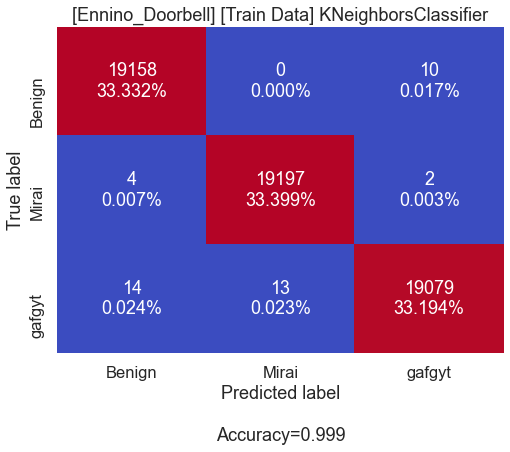


***** [Ennino_Doorbell] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      8188
           1      0.999     0.999     0.999      8174
           2      0.999     0.999     0.999      8271

    accuracy                          0.999     24633
   macro avg      0.999     0.999     0.999     24633
weighted avg      0.999     0.999     0.999     24633



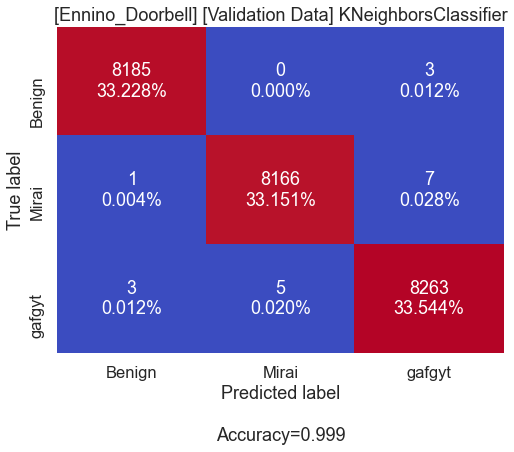


***** [Ennino_Doorbell] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     11744
           1      0.999     0.999     0.999     11723
           2      0.999     0.998     0.999     11723

    accuracy                          0.999     35190
   macro avg      0.999     0.999     0.999     35190
weighted avg      0.999     0.999     0.999     35190



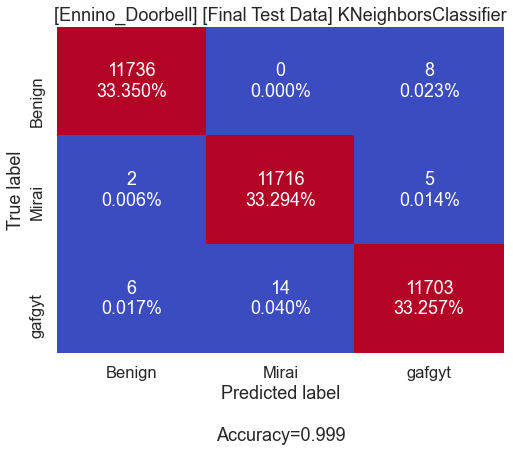

      Train:  Counter({1: 19210, 0: 19176, 2: 19091})
 Validation:  Counter({2: 8273, 0: 8189, 1: 8171})
       Test:  Counter({0: 11744, 1: 11730, 2: 11716})
      Label:  Counter({0: 11744, 1: 11730, 2: 11716})




***** [Ennino_Doorbell] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     19168
           1      1.000     1.000     1.000     19203
           2      0.999     1.000     1.000     19106

    accuracy                          1.000     57477
   macro avg      1.000     1.000     1.000     57477
weighted avg      1.000     1.000     1.000     57477



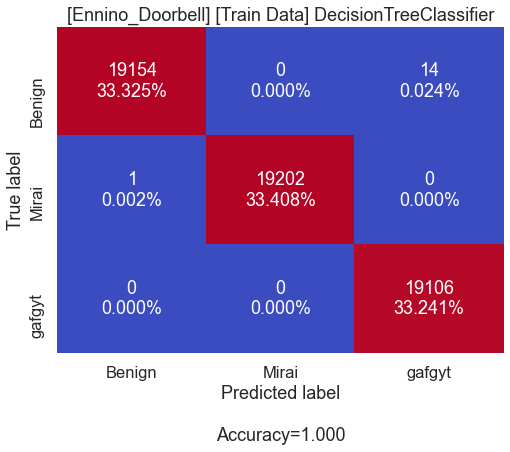


***** [Ennino_Doorbell] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      8188
           1      1.000     1.000     1.000      8174
           2      0.999     1.000     0.999      8271

    accuracy                          1.000     24633
   macro avg      1.000     1.000     1.000     24633
weighted avg      1.000     1.000     1.000     24633



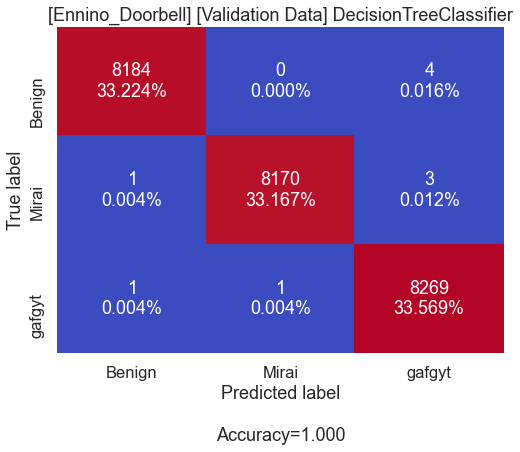


***** [Ennino_Doorbell] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     11744
           1      0.999     1.000     1.000     11723
           2      0.999     0.999     0.999     11723

    accuracy                          0.999     35190
   macro avg      0.999     0.999     0.999     35190
weighted avg      0.999     0.999     0.999     35190



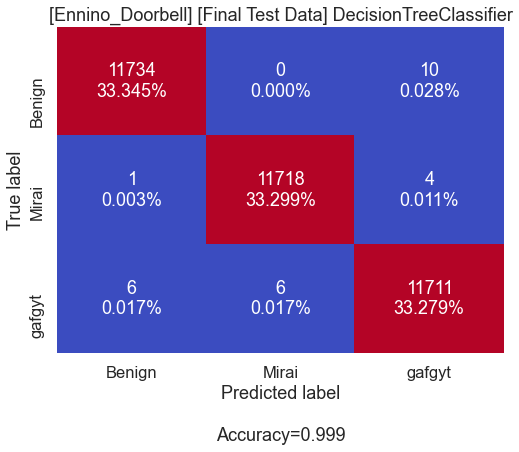

      Train:  Counter({1: 19202, 0: 19155, 2: 19120})
 Validation:  Counter({2: 8276, 0: 8186, 1: 8171})
       Test:  Counter({0: 11741, 2: 11725, 1: 11724})
      Label:  Counter({0: 11741, 2: 11725, 1: 11724})




***** [Ennino_Doorbell] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     19168
           1      1.000     1.000     1.000     19203
           2      0.999     1.000     1.000     19106

    accuracy                          1.000     57477
   macro avg      1.000     1.000     1.000     57477
weighted avg      1.000     1.000     1.000     57477



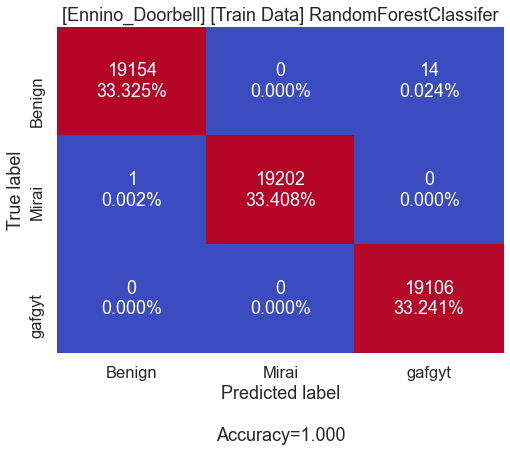


***** [Ennino_Doorbell] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      8188
           1      1.000     1.000     1.000      8174
           2      0.999     1.000     1.000      8271

    accuracy                          1.000     24633
   macro avg      1.000     1.000     1.000     24633
weighted avg      1.000     1.000     1.000     24633



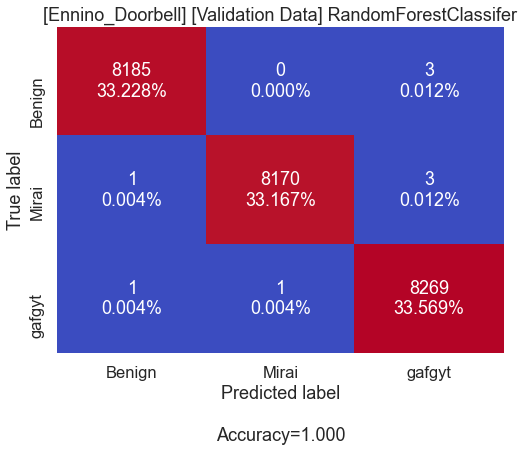


***** [Ennino_Doorbell] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999     11744
           1      1.000     1.000     1.000     11723
           2      0.999     0.999     0.999     11723

    accuracy                          0.999     35190
   macro avg      0.999     0.999     0.999     35190
weighted avg      0.999     0.999     0.999     35190



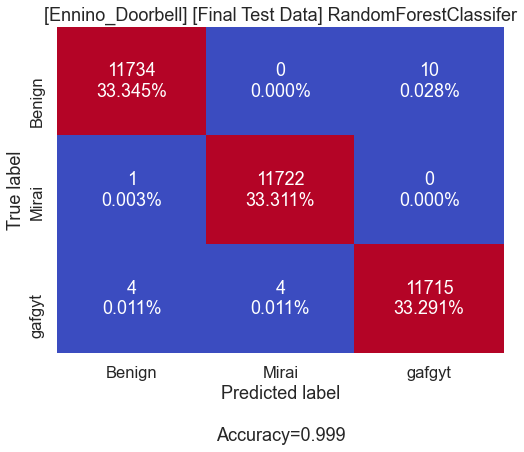

      Train:  Counter({1: 19202, 0: 19155, 2: 19120})
 Validation:  Counter({2: 8275, 0: 8187, 1: 8171})
       Test:  Counter({0: 11739, 1: 11726, 2: 11725})
      Label:  Counter({0: 11744, 1: 11723, 2: 11723})




***** [Ennino_Doorbell] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     19168
           1      1.000     1.000     1.000     19203
           2      0.999     1.000     1.000     19106

    accuracy                          1.000     57477
   macro avg      1.000     1.000     1.000     57477
weighted avg      1.000     1.000     1.000     57477



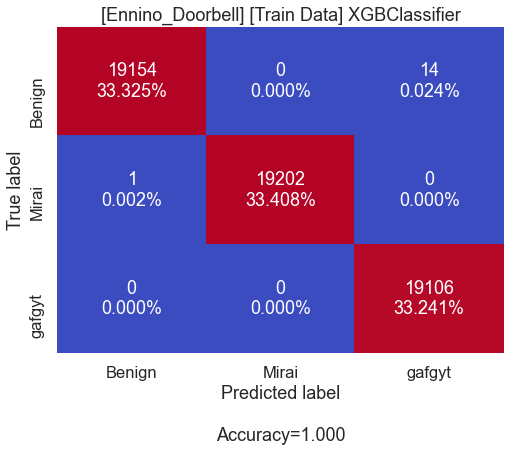


***** [Ennino_Doorbell] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      8188
           1      1.000     1.000     1.000      8174
           2      1.000     1.000     1.000      8271

    accuracy                          1.000     24633
   macro avg      1.000     1.000     1.000     24633
weighted avg      1.000     1.000     1.000     24633



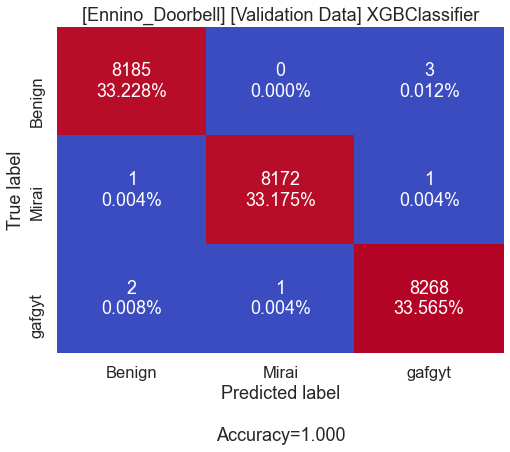


***** [Ennino_Doorbell] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     11744
           1      1.000     1.000     1.000     11723
           2      0.999     0.999     0.999     11723

    accuracy                          0.999     35190
   macro avg      0.999     0.999     0.999     35190
weighted avg      0.999     0.999     0.999     35190



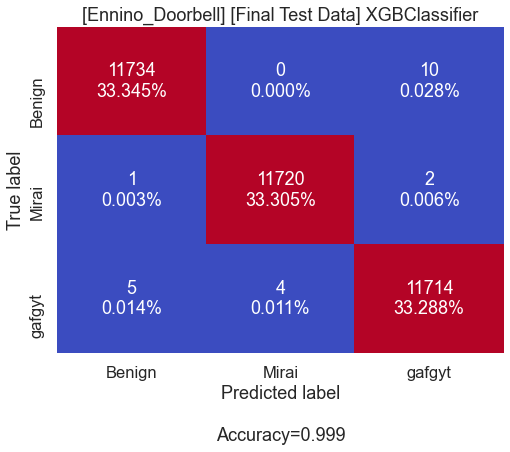

      Train:  Counter({1: 19202, 0: 19155, 2: 19120})
 Validation:  Counter({2: 8272, 0: 8188, 1: 8173})
       Test:  Counter({0: 11740, 2: 11726, 1: 11724})
      Label:  Counter({0: 11744, 1: 11723, 2: 11723})





In [21]:
# Read the pickle file or intantiate IoT_Device
ennino_iot = read_device_pickle(ENNINO_DOORBELL) 
print("Pickle file for Ennino Doorbell is already created.\nDo you want to overwrite it? [Yes/No]", )
if ennino_iot == None:
    # Instantiate class IoT_Device
    ennino_iot = IoT_Device(ENNINO_DOORBELL)
    
    #Pickle the object
    write_device_pickle(ennino_iot, ENNINO_DOORBELL)
model_factory(ennino_iot)

# 3) * Ecobee_Thermostat *

Ready to pickle the device ..  Shape: 39339
Pickled  ../../data_prep/Ecobee_Thermostat.pkl

***** [Ecobee_Thermostat] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.605     1.000     0.754      6430
           1      0.993     0.993     0.993      6347
           2      0.980     0.347     0.512      6498

    accuracy                          0.777     19275
   macro avg      0.859     0.780     0.753     19275
weighted avg      0.859     0.777     0.751     19275



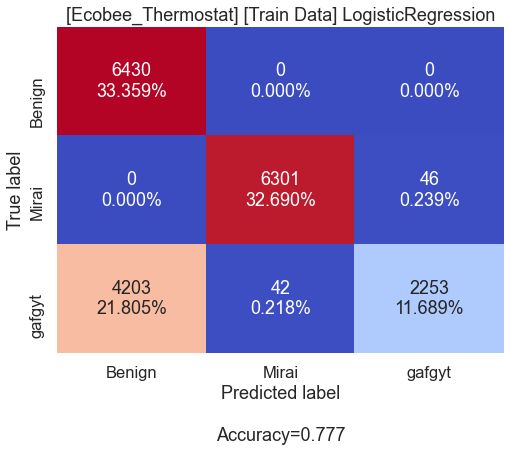


***** [Ecobee_Thermostat] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.607     1.000     0.755      2751
           1      0.995     0.993     0.994      2788
           2      0.979     0.340     0.505      2723

    accuracy                          0.780      8262
   macro avg      0.860     0.778     0.752      8262
weighted avg      0.861     0.780     0.753      8262




***** [Ecobee_Thermostat] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.613     1.000     0.760      3932
           1      0.994     0.992     0.993      3978
           2      0.977     0.355     0.521      3892

    accuracy                          0.785     11802
   macro avg      0.861     0.782     0.758     11802
weighted avg      0.861     0.785     0.760     11802



      Train:  Counter({0: 10633, 1: 6343, 2: 2299})
 Validation:  Counter({0: 4534, 1: 2781, 2: 947})
       Test:  Counter({0: 6417, 1: 3969, 2: 1416})
      Label:  Counter({0: 6417, 1: 3969, 2: 1416})




***** [Ecobee_Thermostat] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      6430
           1      0.999     1.000     0.999      6347
           2      0.999     0.998     0.998      6498

    accuracy                          0.999     19275
   macro avg      0.999     0.999     0.999     19275
weighted avg      0.999     0.999     0.999     19275



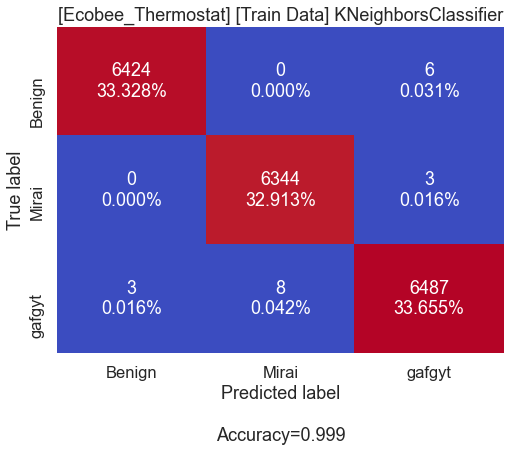


***** [Ecobee_Thermostat] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      2751
           1      0.996     0.999     0.998      2788
           2      0.997     0.995     0.996      2723

    accuracy                          0.998      8262
   macro avg      0.998     0.998     0.998      8262
weighted avg      0.998     0.998     0.998      8262




***** [Ecobee_Thermostat] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000      3932
           1      0.998     0.999     0.999      3978
           2      0.999     0.998     0.998      3892

    accuracy                          0.999     11802
   macro avg      0.999     0.999     0.999     11802
weighted avg      0.999     0.999     0.999     11802



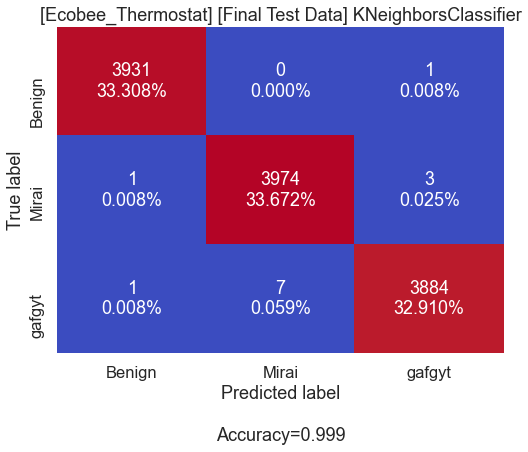

      Train:  Counter({2: 6496, 0: 6427, 1: 6352})
 Validation:  Counter({1: 2795, 0: 2750, 2: 2717})
       Test:  Counter({1: 3981, 0: 3933, 2: 3888})
      Label:  Counter({1: 3981, 0: 3933, 2: 3888})




***** [Ecobee_Thermostat] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      6430
           1      1.000     1.000     1.000      6347
           2      0.999     1.000     1.000      6498

    accuracy                          1.000     19275
   macro avg      1.000     1.000     1.000     19275
weighted avg      1.000     1.000     1.000     19275




***** [Ecobee_Thermostat] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      2751
           1      0.998     1.000     0.999      2788
           2      0.999     0.998     0.998      2723

    accuracy                          0.999      8262
   macro avg      0.999     0.999     0.999      8262
weighted avg      0.999     0.999     0.999      8262



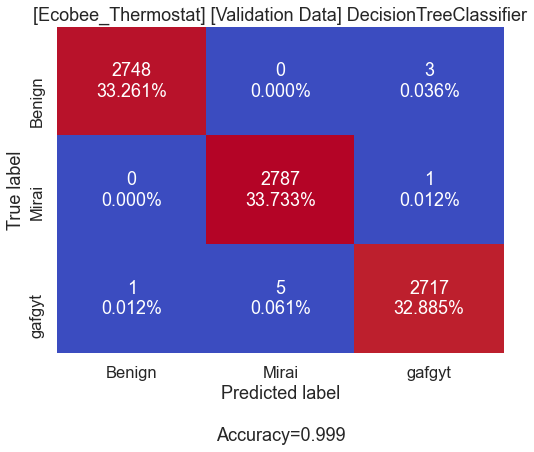


***** [Ecobee_Thermostat] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3932
           1      0.998     0.999     0.999      3978
           2      0.999     0.998     0.999      3892

    accuracy                          0.999     11802
   macro avg      0.999     0.999     0.999     11802
weighted avg      0.999     0.999     0.999     11802



      Train:  Counter({2: 6502, 0: 6426, 1: 6347})
 Validation:  Counter({1: 2792, 0: 2749, 2: 2721})
       Test:  Counter({1: 3981, 0: 3932, 2: 3889})
      Label:  Counter({1: 3981, 0: 3932, 2: 3889})




***** [Ecobee_Thermostat] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      6430
           1      1.000     1.000     1.000      6347
           2      0.999     1.000     1.000      6498

    accuracy                          1.000     19275
   macro avg      1.000     1.000     1.000     19275
weighted avg      1.000     1.000     1.000     19275




***** [Ecobee_Thermostat] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      2751
           1      0.999     1.000     1.000      2788
           2      0.999     0.999     0.999      2723

    accuracy                          0.999      8262
   macro avg      0.999     0.999     0.999      8262
weighted avg      0.999     0.999     0.999      8262



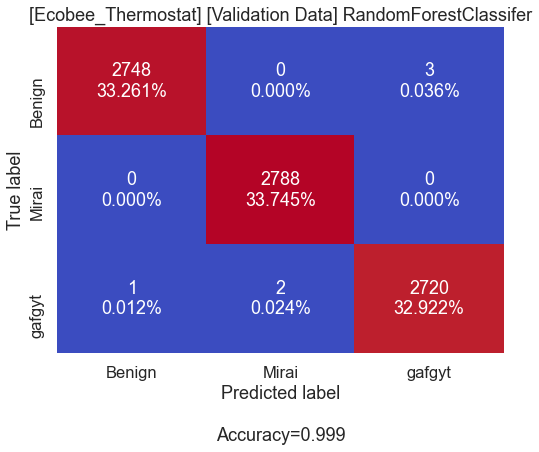


***** [Ecobee_Thermostat] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3932
           1      1.000     0.999     1.000      3978
           2      0.999     1.000     1.000      3892

    accuracy                          1.000     11802
   macro avg      1.000     1.000     1.000     11802
weighted avg      1.000     1.000     1.000     11802



      Train:  Counter({2: 6502, 0: 6426, 1: 6347})
 Validation:  Counter({1: 2790, 0: 2749, 2: 2723})
       Test:  Counter({1: 3977, 0: 3932, 2: 3893})
      Label:  Counter({1: 3978, 0: 3932, 2: 3892})




***** [Ecobee_Thermostat] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      6430
           1      1.000     1.000     1.000      6347
           2      0.999     1.000     1.000      6498

    accuracy                          1.000     19275
   macro avg      1.000     1.000     1.000     19275
weighted avg      1.000     1.000     1.000     19275




***** [Ecobee_Thermostat] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     0.999      2751
           1      1.000     1.000     1.000      2788
           2      0.999     0.999     0.999      2723

    accuracy                          0.999      8262
   macro avg      0.999     0.999     0.999      8262
weighted avg      0.999     0.999     0.999      8262




***** [Ecobee_Thermostat] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3932
           1      0.999     1.000     1.000      3978
           2      1.000     0.999     1.000      3892

    accuracy                          1.000     11802
   macro avg      1.000     1.000     1.000     11802
weighted avg      1.000     1.000     1.000     11802



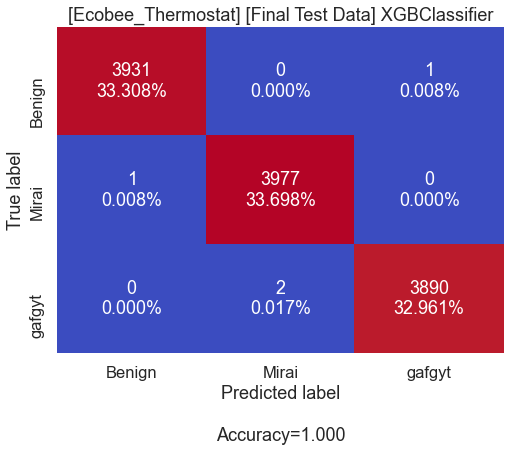

      Train:  Counter({2: 6502, 0: 6426, 1: 6347})
 Validation:  Counter({1: 2789, 0: 2749, 2: 2724})
       Test:  Counter({1: 3979, 0: 3932, 2: 3891})
      Label:  Counter({1: 3978, 0: 3932, 2: 3892})





In [22]:
# Read the pickle file or intantiate IoT_Device
ecobee_iot = read_device_pickle(ECOBEE_THERMOSTAT)    
if ecobee_iot == None:
    # Instantiate class IoT_Device
    ecobee_iot = IoT_Device(ECOBEE_THERMOSTAT)
    
    #Pickle the object
    write_device_pickle(ecobee_iot, ECOBEE_THERMOSTAT)
model_factory(ecobee_iot)

# 4) * Philips_B120N10_Baby_Monitor *

Ready to pickle the device ..  Shape: 525720
Pickled  ../../data_prep/Philips_B120N10_Baby_Monitor.pkl

***** [Philips_B120N10_Baby_Monitor] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.608     0.993     0.754     85701
           1      0.999     0.999     0.999     85706
           2      0.979     0.365     0.531     86195

    accuracy                          0.785    257602
   macro avg      0.862     0.785     0.762    257602
weighted avg      0.862     0.785     0.761    257602




***** [Philips_B120N10_Baby_Monitor] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.609     0.994     0.755     36767
           1      0.999     0.999     0.999     36776
           2      0.982     0.365     0.532     36859

    accuracy                          0.785    110402
   macro avg      0.863     0.786     0.762    110402
weighted avg      0.864     0.785     0.762    110402



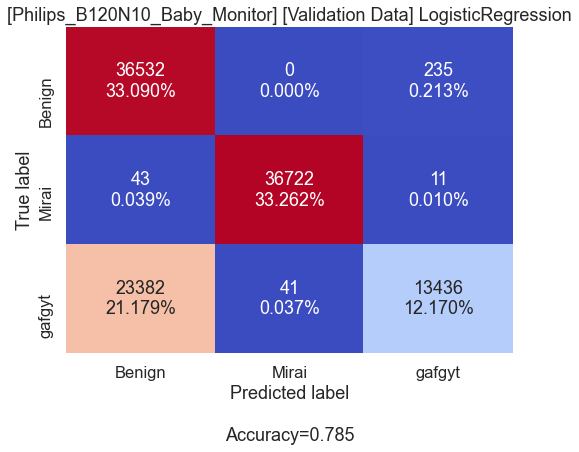


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.612     0.993     0.757     52772
           1      0.999     0.999     0.999     52758
           2      0.980     0.362     0.529     52186

    accuracy                          0.786    157716
   macro avg      0.863     0.785     0.762    157716
weighted avg      0.863     0.786     0.763    157716



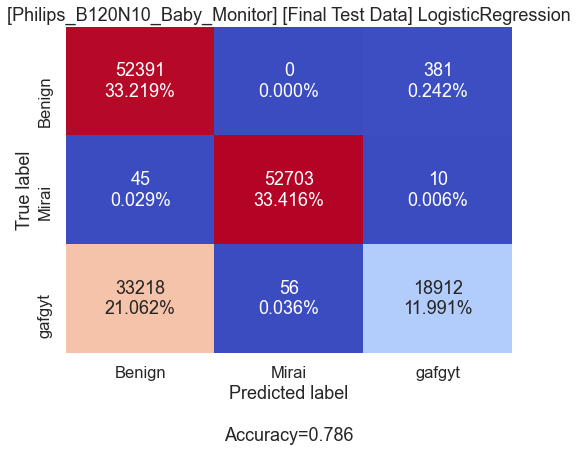

      Train:  Counter({0: 139799, 1: 85721, 2: 32082})
 Validation:  Counter({0: 59957, 1: 36763, 2: 13682})
       Test:  Counter({0: 85654, 1: 52759, 2: 19303})
      Label:  Counter({0: 85654, 1: 52759, 2: 19303})




***** [Philips_B120N10_Baby_Monitor] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     85701
           1      1.000     1.000     1.000     85706
           2      1.000     0.999     1.000     86195

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



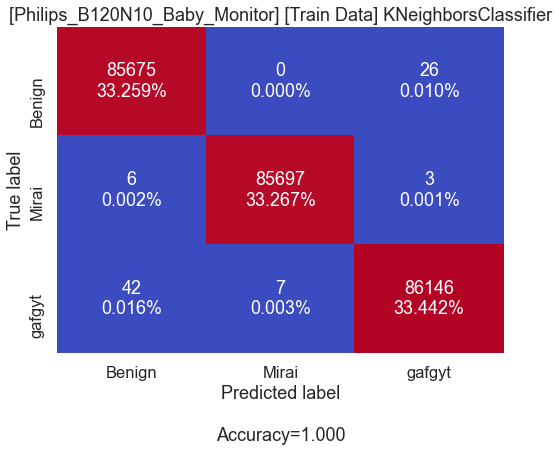


***** [Philips_B120N10_Baby_Monitor] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     36767
           1      1.000     1.000     1.000     36776
           2      1.000     0.999     1.000     36859

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



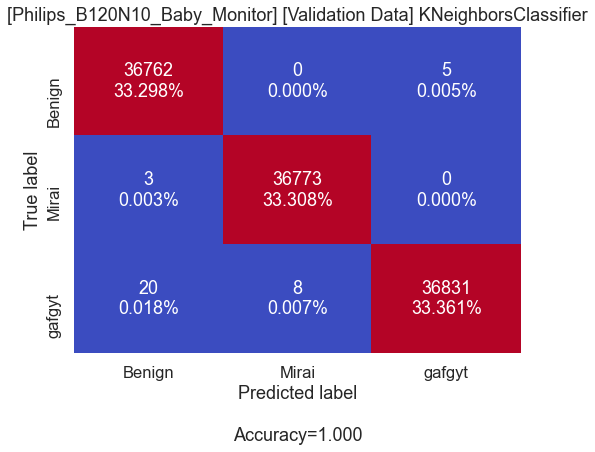


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     52772
           1      1.000     1.000     1.000     52758
           2      1.000     0.999     1.000     52186

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



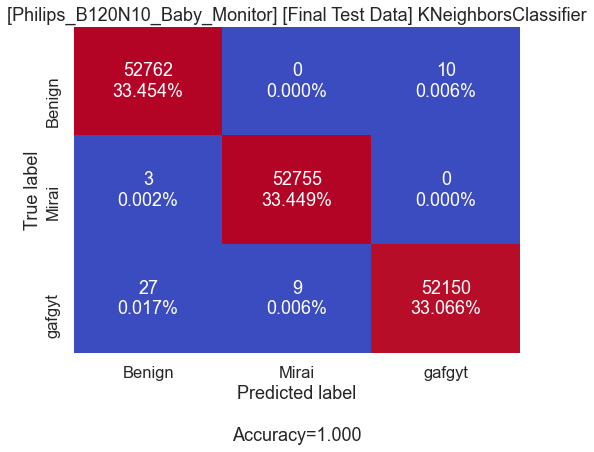

      Train:  Counter({2: 86175, 0: 85723, 1: 85704})
 Validation:  Counter({2: 36836, 0: 36785, 1: 36781})
       Test:  Counter({0: 52792, 1: 52764, 2: 52160})
      Label:  Counter({0: 52792, 1: 52764, 2: 52160})




***** [Philips_B120N10_Baby_Monitor] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85701
           1      1.000     1.000     1.000     85706
           2      1.000     1.000     1.000     86195

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



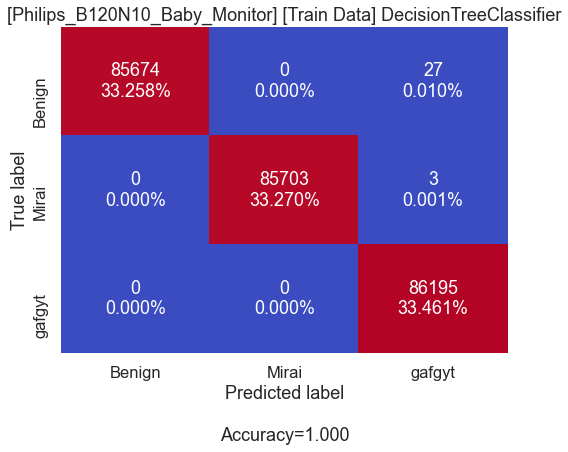


***** [Philips_B120N10_Baby_Monitor] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36767
           1      1.000     1.000     1.000     36776
           2      1.000     1.000     1.000     36859

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



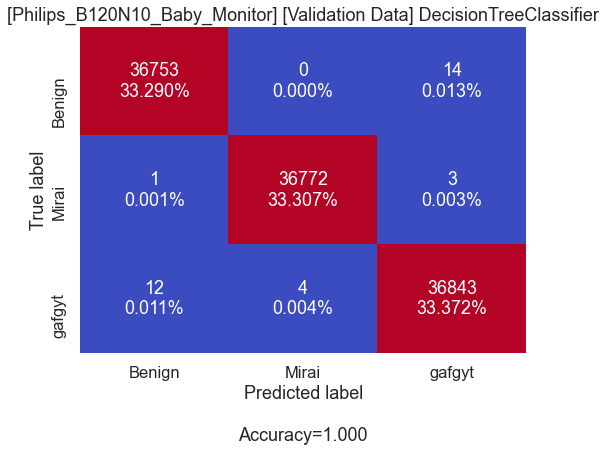


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     52772
           1      1.000     1.000     1.000     52758
           2      1.000     1.000     1.000     52186

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



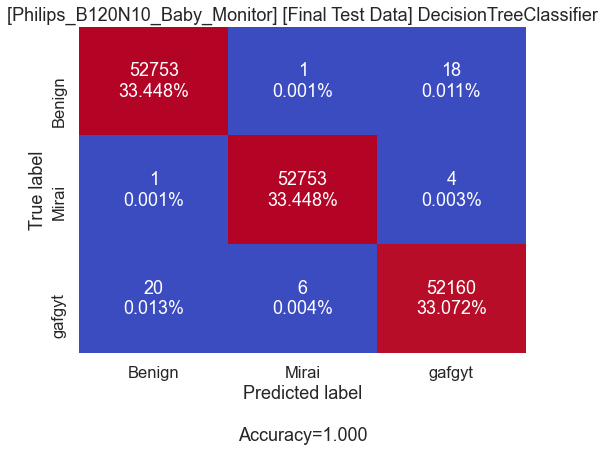

      Train:  Counter({2: 86225, 1: 85703, 0: 85674})
 Validation:  Counter({2: 36860, 1: 36776, 0: 36766})
       Test:  Counter({0: 52774, 1: 52760, 2: 52182})
      Label:  Counter({0: 52774, 1: 52760, 2: 52182})




***** [Philips_B120N10_Baby_Monitor] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85701
           1      1.000     1.000     1.000     85706
           2      1.000     1.000     1.000     86195

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



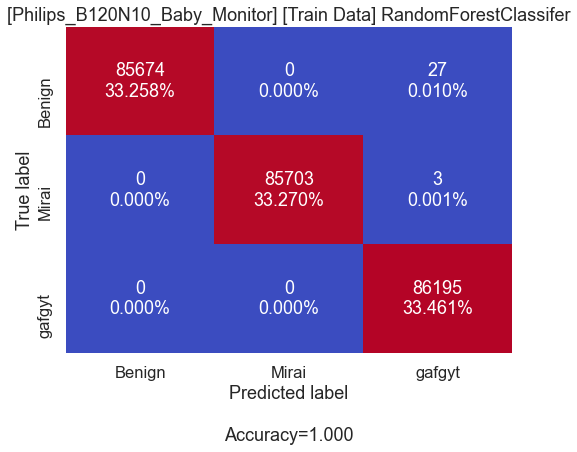


***** [Philips_B120N10_Baby_Monitor] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36767
           1      1.000     1.000     1.000     36776
           2      1.000     1.000     1.000     36859

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



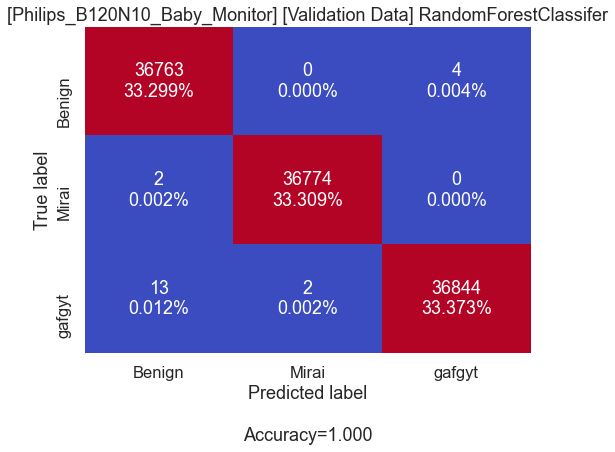


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     52772
           1      1.000     1.000     1.000     52758
           2      1.000     0.999     1.000     52186

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



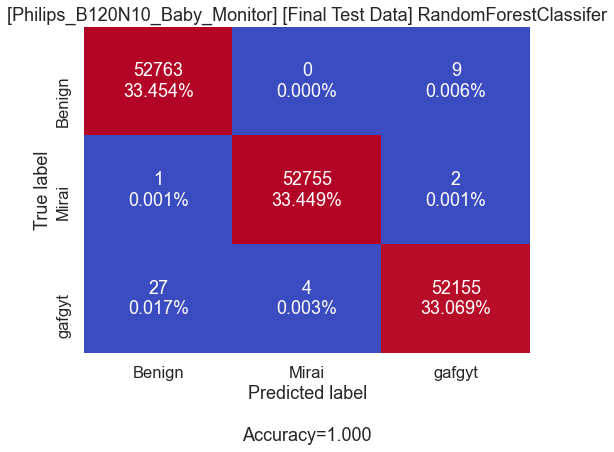

      Train:  Counter({2: 86225, 1: 85703, 0: 85674})
 Validation:  Counter({2: 36848, 0: 36778, 1: 36776})
       Test:  Counter({0: 52791, 1: 52759, 2: 52166})
      Label:  Counter({0: 52772, 1: 52758, 2: 52186})




***** [Philips_B120N10_Baby_Monitor] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     85701
           1      1.000     1.000     1.000     85706
           2      1.000     1.000     1.000     86195

    accuracy                          1.000    257602
   macro avg      1.000     1.000     1.000    257602
weighted avg      1.000     1.000     1.000    257602



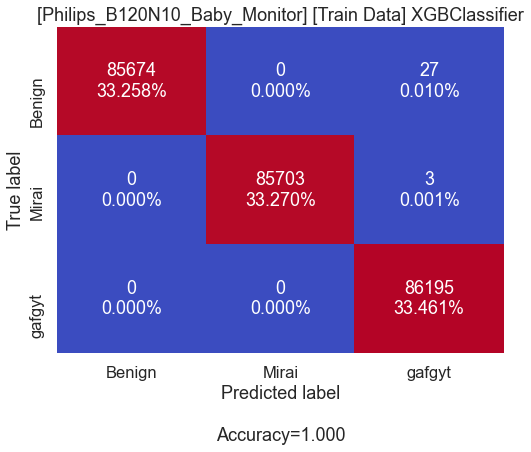


***** [Philips_B120N10_Baby_Monitor] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     36767
           1      1.000     1.000     1.000     36776
           2      1.000     1.000     1.000     36859

    accuracy                          1.000    110402
   macro avg      1.000     1.000     1.000    110402
weighted avg      1.000     1.000     1.000    110402



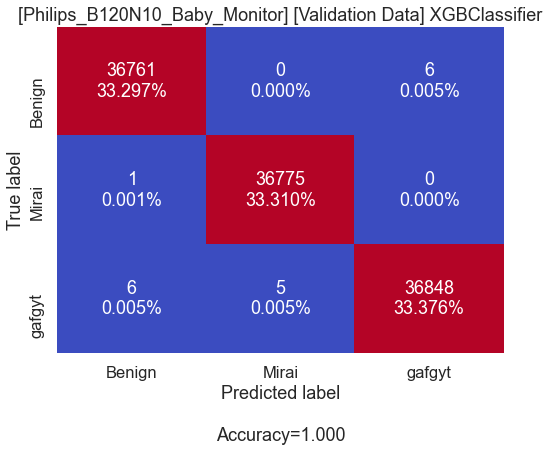


***** [Philips_B120N10_Baby_Monitor] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     52772
           1      1.000     1.000     1.000     52758
           2      1.000     1.000     1.000     52186

    accuracy                          1.000    157716
   macro avg      1.000     1.000     1.000    157716
weighted avg      1.000     1.000     1.000    157716



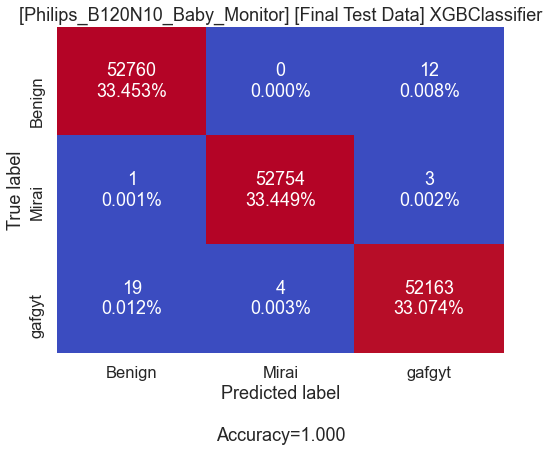

      Train:  Counter({2: 86225, 1: 85703, 0: 85674})
 Validation:  Counter({2: 36854, 1: 36780, 0: 36768})
       Test:  Counter({0: 52780, 1: 52758, 2: 52178})
      Label:  Counter({0: 52772, 1: 52758, 2: 52186})





In [23]:
# Read the pickle file or intantiate IoT_Device
B120N10_iot = read_device_pickle(PHILIPS_B120N10_BABYMONITOR)    
if B120N10_iot == None:
    # Instantiate class IoT_Device
    B120N10_iot = IoT_Device(PHILIPS_B120N10_BABYMONITOR)
    
    #Pickle the object
    write_device_pickle(B120N10_iot, PHILIPS_B120N10_BABYMONITOR)
model_factory(B120N10_iot)

# 5) Provision_PT_737E_Security_Camera

Ready to pickle the device ..  Shape: 186462
Pickled  ../../data_prep/Provision_PT_737E_Security_Camera.pkl

***** [Provision_PT_737E_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.611     0.993     0.756     30375
           1      0.995     0.990     0.993     30552
           2      0.957     0.364     0.527     30439

    accuracy                          0.782     91366
   macro avg      0.854     0.782     0.759     91366
weighted avg      0.855     0.782     0.759     91366



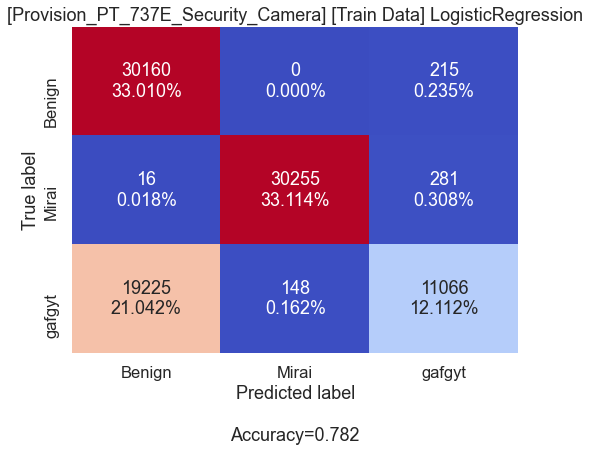


***** [Provision_PT_737E_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.609     0.994     0.755     13012
           1      0.996     0.991     0.994     13074
           2      0.963     0.359     0.523     13071

    accuracy                          0.781     39157
   macro avg      0.856     0.782     0.757     39157
weighted avg      0.856     0.781     0.757     39157



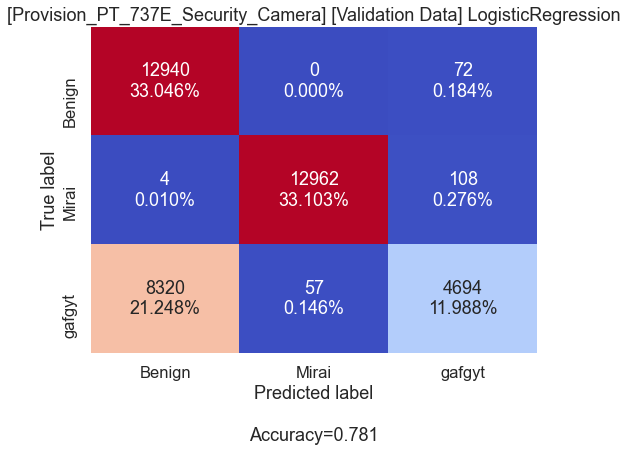


***** [Provision_PT_737E_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.612     0.993     0.757     18767
           1      0.996     0.991     0.993     18528
           2      0.959     0.362     0.526     18644

    accuracy                          0.782     55939
   macro avg      0.856     0.782     0.759     55939
weighted avg      0.855     0.782     0.758     55939



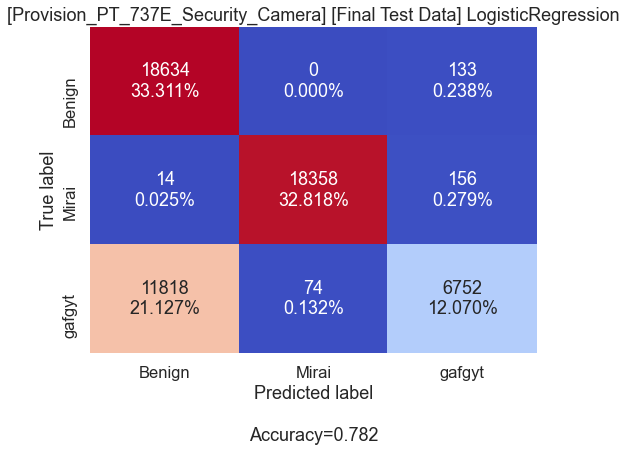

      Train:  Counter({0: 49401, 1: 30403, 2: 11562})
 Validation:  Counter({0: 21264, 1: 13019, 2: 4874})
       Test:  Counter({0: 30466, 1: 18432, 2: 7041})
      Label:  Counter({0: 30466, 1: 18432, 2: 7041})




***** [Provision_PT_737E_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     30375
           1      1.000     1.000     1.000     30552
           2      1.000     0.999     0.999     30439

    accuracy                          0.999     91366
   macro avg      0.999     0.999     0.999     91366
weighted avg      0.999     0.999     0.999     91366



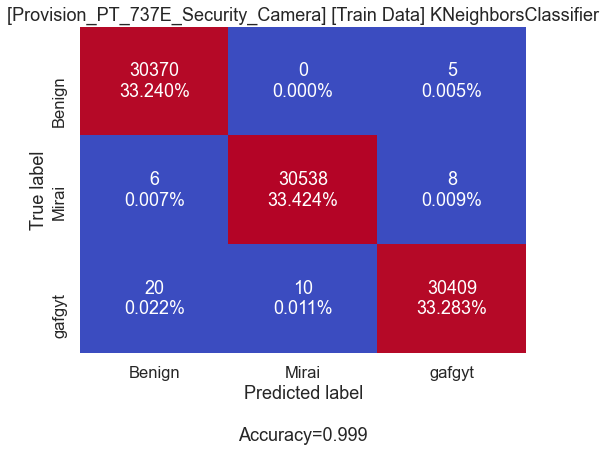


***** [Provision_PT_737E_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     13012
           1      1.000     0.999     1.000     13074
           2      0.999     0.999     0.999     13071

    accuracy                          0.999     39157
   macro avg      0.999     0.999     0.999     39157
weighted avg      0.999     0.999     0.999     39157



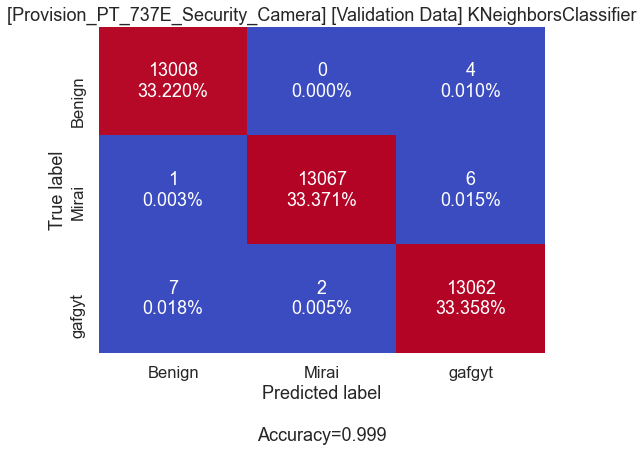


***** [Provision_PT_737E_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18767
           1      1.000     0.999     0.999     18528
           2      0.999     0.999     0.999     18644

    accuracy                          0.999     55939
   macro avg      0.999     0.999     0.999     55939
weighted avg      0.999     0.999     0.999     55939



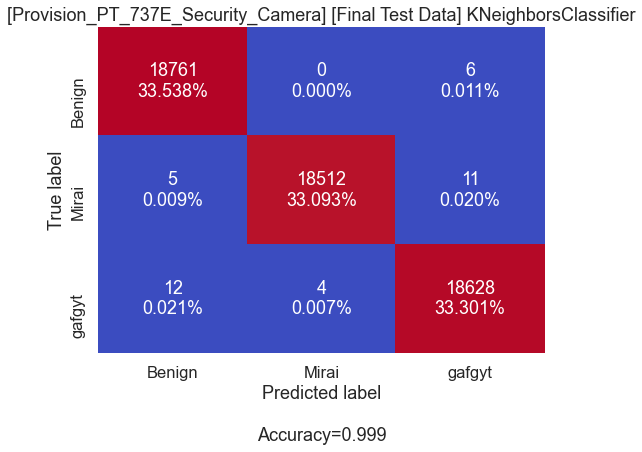

      Train:  Counter({1: 30548, 2: 30422, 0: 30396})
 Validation:  Counter({2: 13072, 1: 13069, 0: 13016})
       Test:  Counter({0: 18778, 2: 18645, 1: 18516})
      Label:  Counter({0: 18778, 2: 18645, 1: 18516})




***** [Provision_PT_737E_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     30375
           1      1.000     1.000     1.000     30552
           2      1.000     1.000     1.000     30439

    accuracy                          1.000     91366
   macro avg      1.000     1.000     1.000     91366
weighted avg      1.000     1.000     1.000     91366



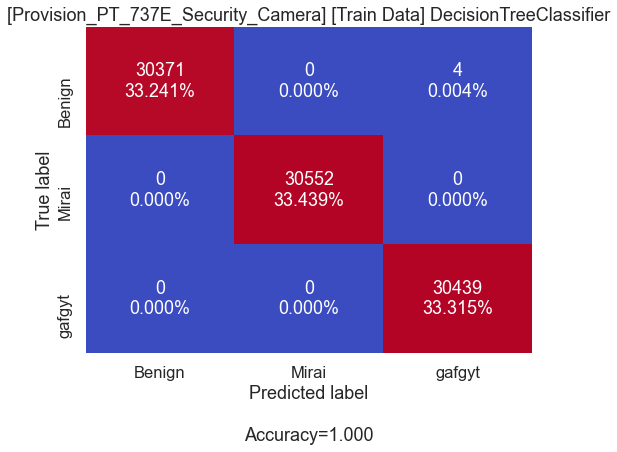


***** [Provision_PT_737E_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     13012
           1      1.000     1.000     1.000     13074
           2      1.000     1.000     1.000     13071

    accuracy                          1.000     39157
   macro avg      1.000     1.000     1.000     39157
weighted avg      1.000     1.000     1.000     39157



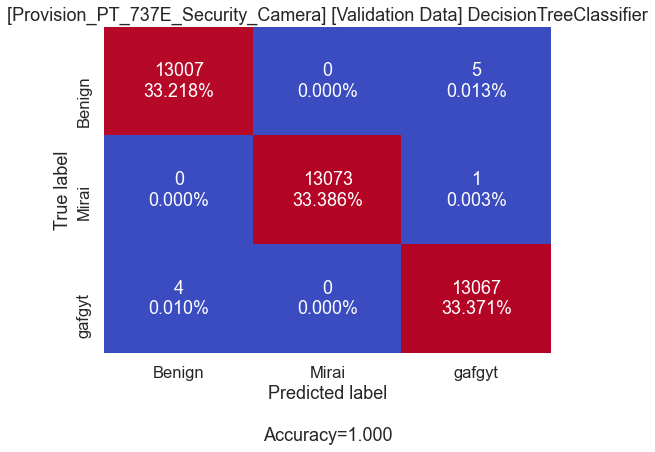


***** [Provision_PT_737E_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18767
           1      1.000     1.000     1.000     18528
           2      0.999     1.000     0.999     18644

    accuracy                          1.000     55939
   macro avg      1.000     1.000     1.000     55939
weighted avg      1.000     1.000     1.000     55939



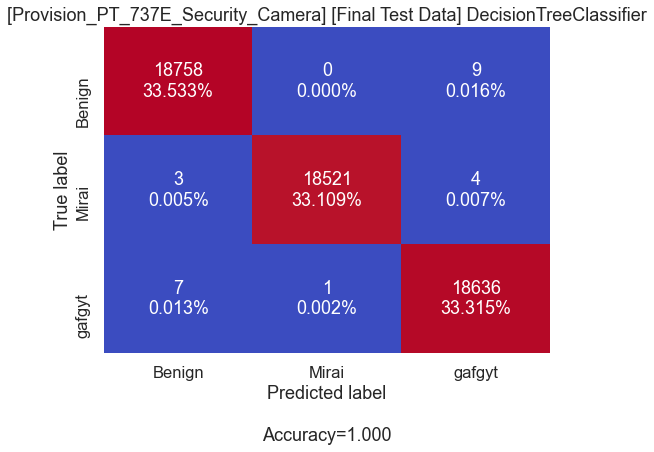

      Train:  Counter({1: 30552, 2: 30443, 0: 30371})
 Validation:  Counter({2: 13073, 1: 13073, 0: 13011})
       Test:  Counter({0: 18768, 2: 18649, 1: 18522})
      Label:  Counter({0: 18768, 2: 18649, 1: 18522})




***** [Provision_PT_737E_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     30375
           1      1.000     1.000     1.000     30552
           2      1.000     1.000     1.000     30439

    accuracy                          1.000     91366
   macro avg      1.000     1.000     1.000     91366
weighted avg      1.000     1.000     1.000     91366



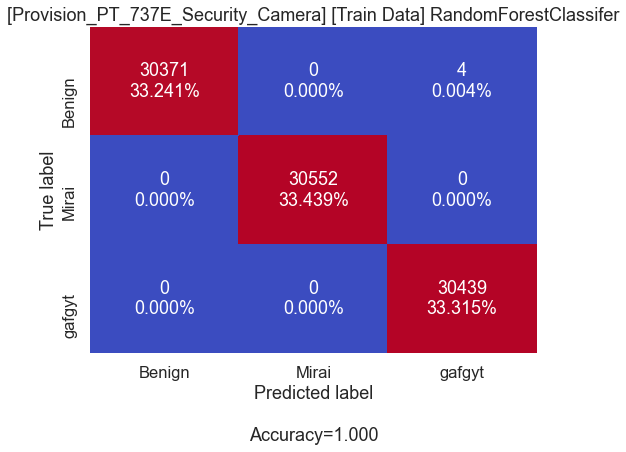


***** [Provision_PT_737E_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     13012
           1      1.000     1.000     1.000     13074
           2      1.000     0.999     1.000     13071

    accuracy                          1.000     39157
   macro avg      1.000     1.000     1.000     39157
weighted avg      1.000     1.000     1.000     39157



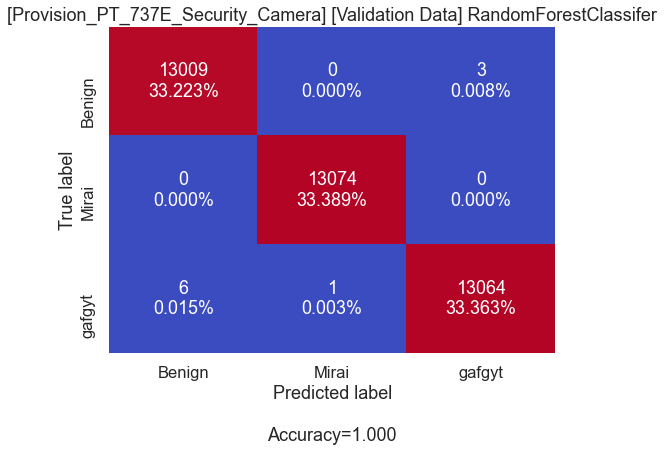


***** [Provision_PT_737E_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     18767
           1      1.000     1.000     1.000     18528
           2      1.000     0.999     1.000     18644

    accuracy                          1.000     55939
   macro avg      1.000     1.000     1.000     55939
weighted avg      1.000     1.000     1.000     55939



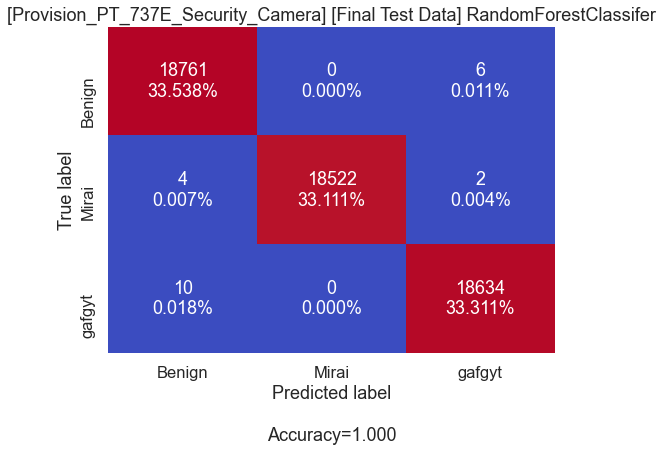

      Train:  Counter({1: 30552, 2: 30443, 0: 30371})
 Validation:  Counter({1: 13075, 2: 13067, 0: 13015})
       Test:  Counter({0: 18775, 2: 18642, 1: 18522})
      Label:  Counter({0: 18767, 2: 18644, 1: 18528})




***** [Provision_PT_737E_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     30375
           1      1.000     1.000     1.000     30552
           2      1.000     1.000     1.000     30439

    accuracy                          1.000     91366
   macro avg      1.000     1.000     1.000     91366
weighted avg      1.000     1.000     1.000     91366



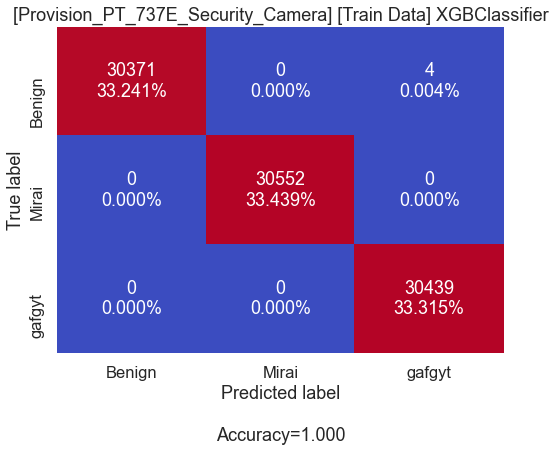


***** [Provision_PT_737E_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     13012
           1      1.000     1.000     1.000     13074
           2      1.000     1.000     1.000     13071

    accuracy                          1.000     39157
   macro avg      1.000     1.000     1.000     39157
weighted avg      1.000     1.000     1.000     39157



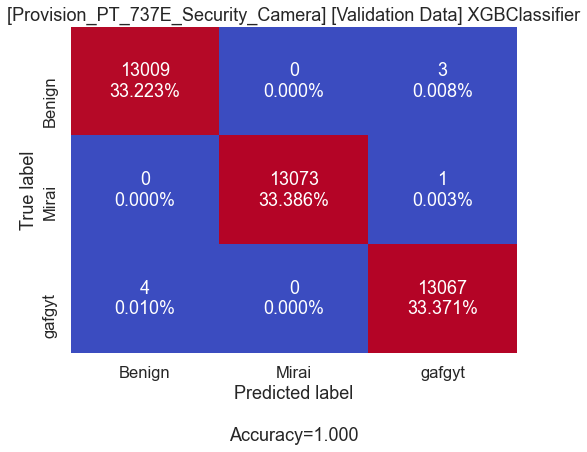


***** [Provision_PT_737E_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     18767
           1      1.000     1.000     1.000     18528
           2      0.999     1.000     0.999     18644

    accuracy                          1.000     55939
   macro avg      1.000     1.000     1.000     55939
weighted avg      1.000     1.000     1.000     55939



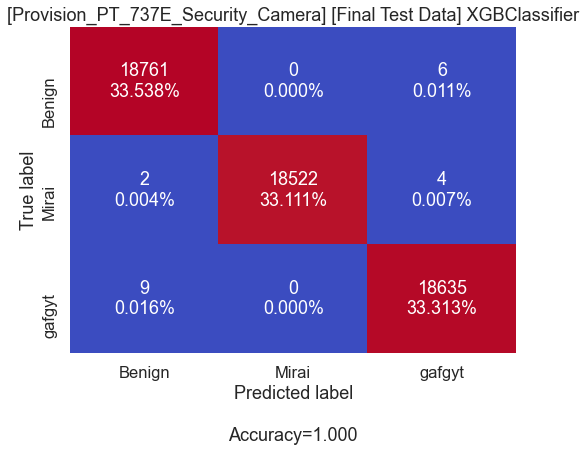

      Train:  Counter({1: 30552, 2: 30443, 0: 30371})
 Validation:  Counter({1: 13073, 2: 13071, 0: 13013})
       Test:  Counter({0: 18772, 2: 18645, 1: 18522})
      Label:  Counter({0: 18767, 2: 18644, 1: 18528})





In [24]:
# Read the pickle file or intantiate IoT_Device
PT737E_iot = read_device_pickle(PROVISION_737E_SECURITY_CAMERA)    
if PT737E_iot == None:
    # Instantiate class IoT_Device
    PT737E_iot = IoT_Device(PROVISION_737E_SECURITY_CAMERA)
    
    #Pickle the object
    write_device_pickle(PT737E_iot, PROVISION_737E_SECURITY_CAMERA)
model_factory(PT737E_iot)

# 6) Provision_PT_838_Security_Camera

Ready to pickle the device ..  Shape: 295542
Pickled  ../../data_prep/Provision_PT_838_Security_Camera.pkl

***** [Provision_PT_838_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.601     0.944     0.734     48399
           1      0.997     0.994     0.996     48220
           2      0.859     0.369     0.517     48196

    accuracy                          0.769    144815
   macro avg      0.819     0.769     0.749    144815
weighted avg      0.819     0.769     0.749    144815



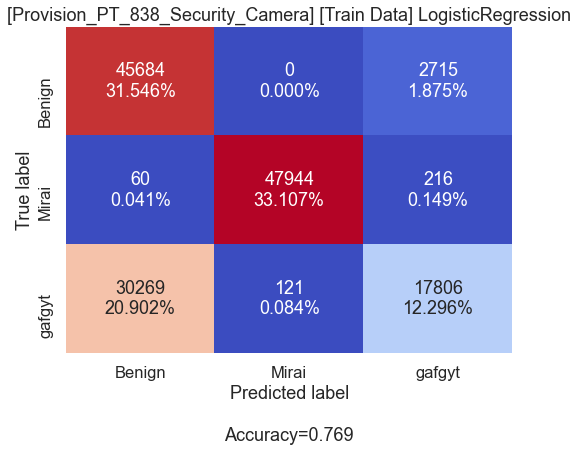


***** [Provision_PT_838_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.601     0.944     0.734     20723
           1      0.997     0.994     0.996     20599
           2      0.861     0.372     0.520     20742

    accuracy                          0.770     62064
   macro avg      0.820     0.770     0.750     62064
weighted avg      0.819     0.770     0.749     62064



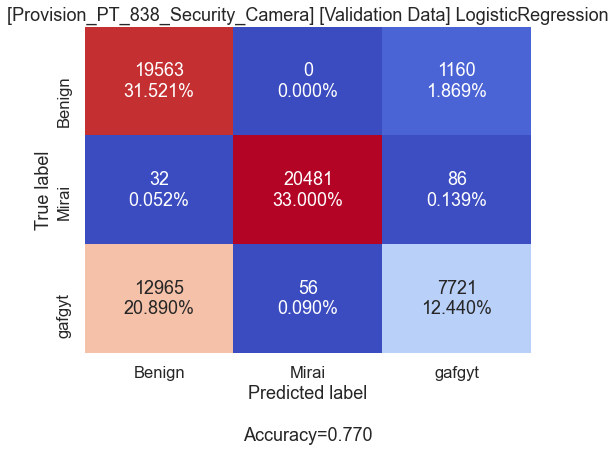


***** [Provision_PT_838_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.598     0.945     0.732     29392
           1      0.998     0.995     0.996     29695
           2      0.861     0.366     0.514     29576

    accuracy                          0.769     88663
   macro avg      0.819     0.769     0.747     88663
weighted avg      0.820     0.769     0.748     88663



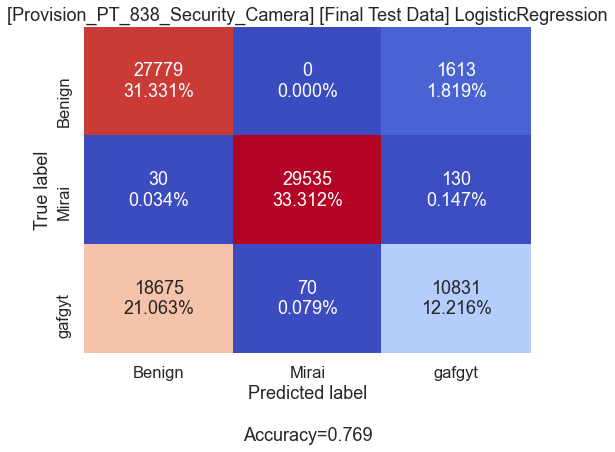

      Train:  Counter({0: 76013, 1: 48065, 2: 20737})
 Validation:  Counter({0: 32560, 1: 20537, 2: 8967})
       Test:  Counter({0: 46484, 1: 29605, 2: 12574})
      Label:  Counter({0: 46484, 1: 29605, 2: 12574})




***** [Provision_PT_838_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     48399
           1      1.000     1.000     1.000     48220
           2      1.000     0.999     0.999     48196

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



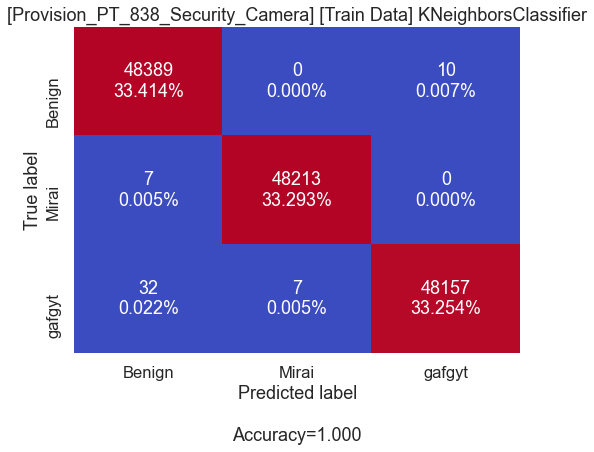


***** [Provision_PT_838_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20723
           1      1.000     1.000     1.000     20599
           2      1.000     1.000     1.000     20742

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



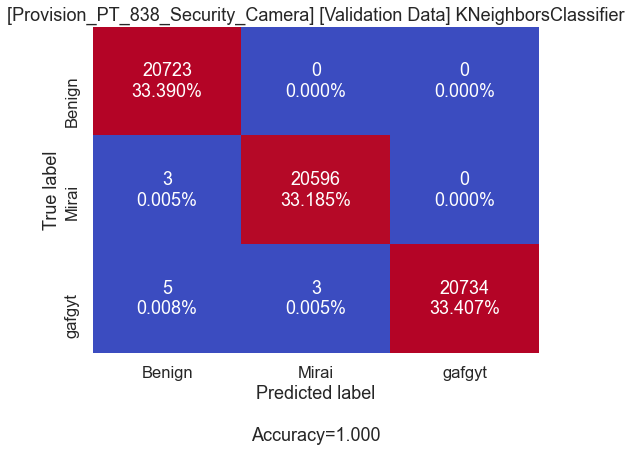


***** [Provision_PT_838_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     29392
           1      1.000     1.000     1.000     29695
           2      1.000     0.999     0.999     29576

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



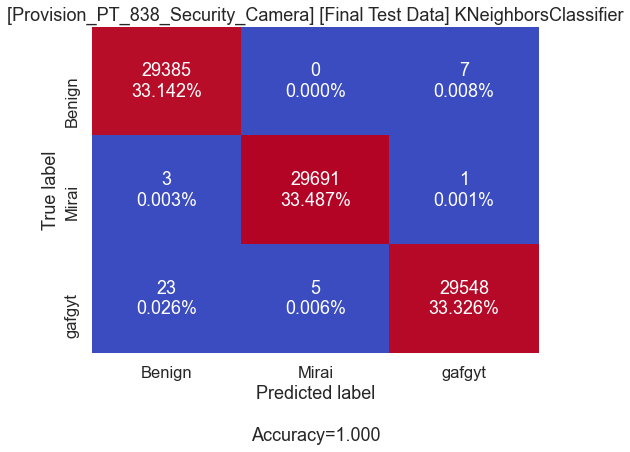

      Train:  Counter({0: 48428, 1: 48220, 2: 48167})
 Validation:  Counter({2: 20734, 0: 20731, 1: 20599})
       Test:  Counter({1: 29696, 2: 29556, 0: 29411})
      Label:  Counter({1: 29696, 2: 29556, 0: 29411})




***** [Provision_PT_838_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     48399
           1      1.000     1.000     1.000     48220
           2      1.000     1.000     1.000     48196

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



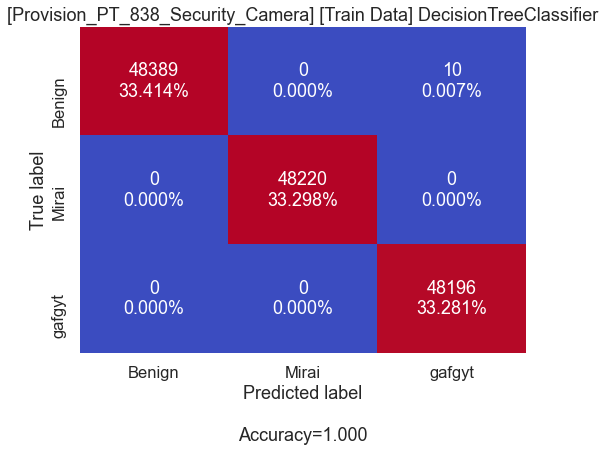


***** [Provision_PT_838_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20723
           1      1.000     1.000     1.000     20599
           2      0.999     1.000     1.000     20742

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



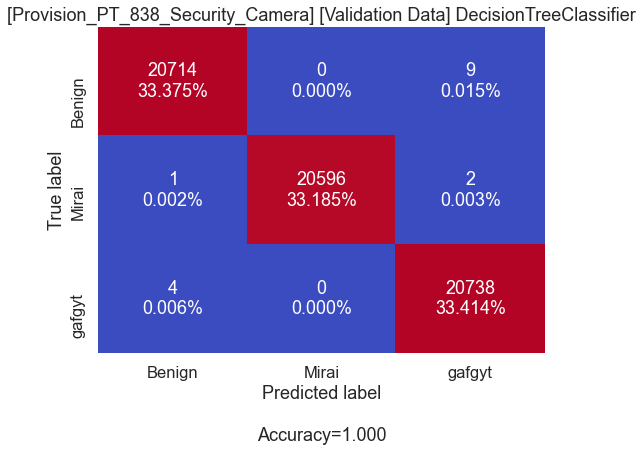


***** [Provision_PT_838_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     29392
           1      1.000     1.000     1.000     29695
           2      0.999     0.999     0.999     29576

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



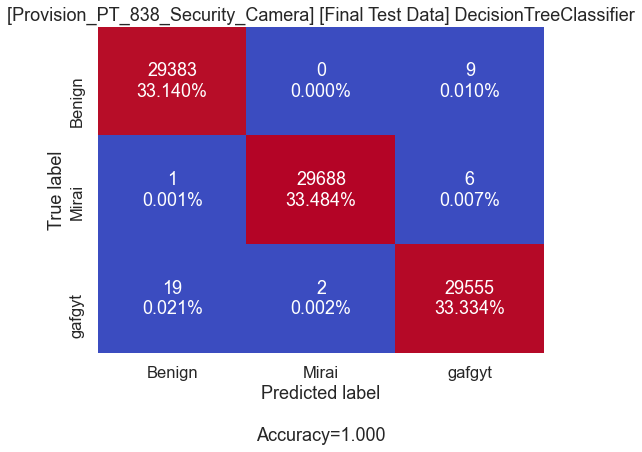

      Train:  Counter({0: 48389, 1: 48220, 2: 48206})
 Validation:  Counter({2: 20749, 0: 20719, 1: 20596})
       Test:  Counter({1: 29690, 2: 29570, 0: 29403})
      Label:  Counter({1: 29690, 2: 29570, 0: 29403})




***** [Provision_PT_838_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     48399
           1      1.000     1.000     1.000     48220
           2      1.000     1.000     1.000     48196

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



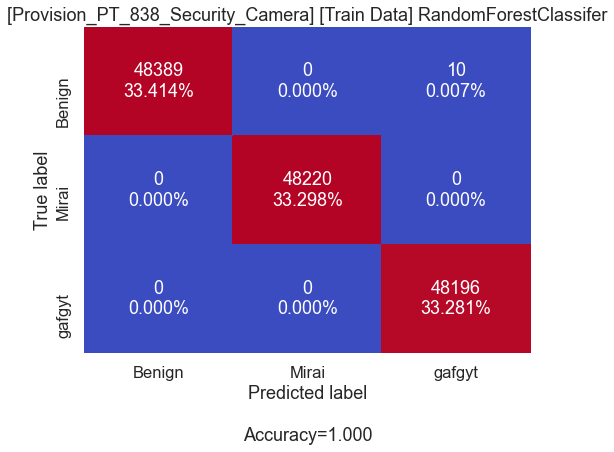


***** [Provision_PT_838_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20723
           1      1.000     1.000     1.000     20599
           2      1.000     1.000     1.000     20742

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



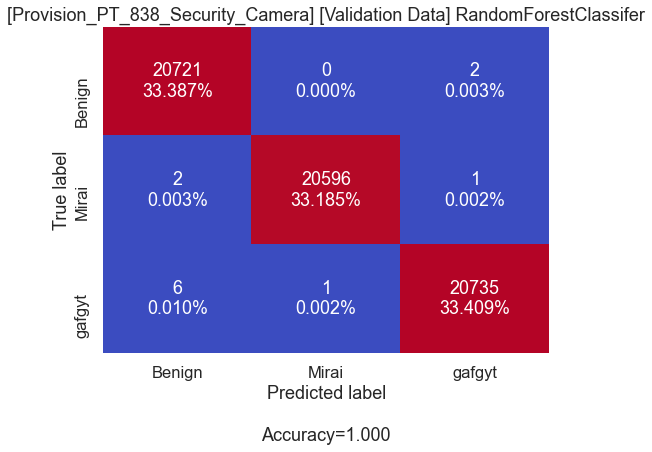


***** [Provision_PT_838_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     29392
           1      1.000     1.000     1.000     29695
           2      1.000     0.999     0.999     29576

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



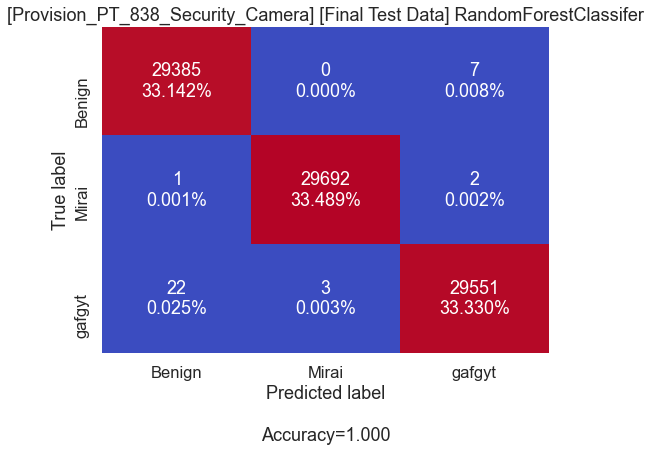

      Train:  Counter({0: 48389, 1: 48220, 2: 48206})
 Validation:  Counter({2: 20738, 0: 20729, 1: 20597})
       Test:  Counter({1: 29695, 2: 29560, 0: 29408})
      Label:  Counter({1: 29695, 2: 29576, 0: 29392})




***** [Provision_PT_838_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     48399
           1      1.000     1.000     1.000     48220
           2      1.000     1.000     1.000     48196

    accuracy                          1.000    144815
   macro avg      1.000     1.000     1.000    144815
weighted avg      1.000     1.000     1.000    144815



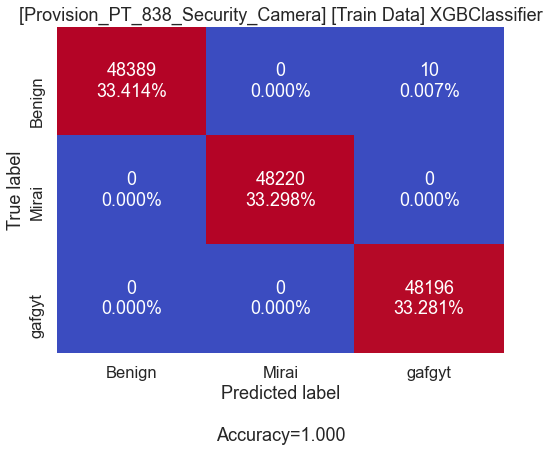


***** [Provision_PT_838_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     20723
           1      1.000     1.000     1.000     20599
           2      1.000     1.000     1.000     20742

    accuracy                          1.000     62064
   macro avg      1.000     1.000     1.000     62064
weighted avg      1.000     1.000     1.000     62064



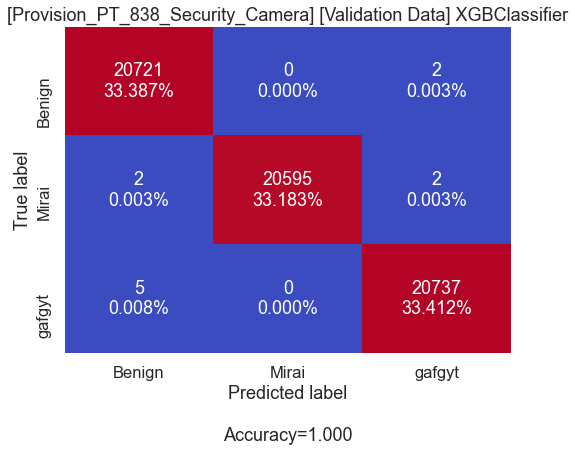


***** [Provision_PT_838_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     29392
           1      1.000     1.000     1.000     29695
           2      1.000     0.999     1.000     29576

    accuracy                          1.000     88663
   macro avg      1.000     1.000     1.000     88663
weighted avg      1.000     1.000     1.000     88663



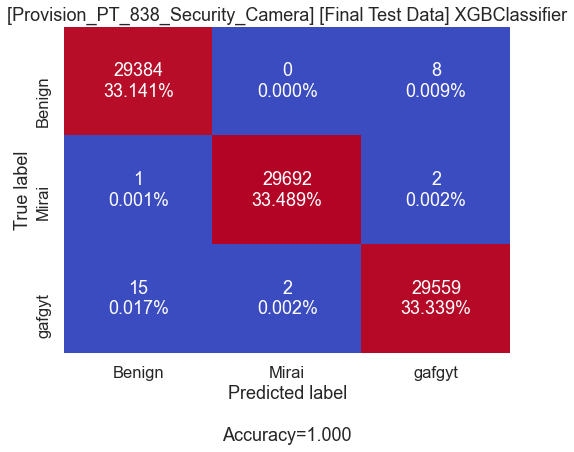

      Train:  Counter({0: 48389, 1: 48220, 2: 48206})
 Validation:  Counter({2: 20741, 0: 20728, 1: 20595})
       Test:  Counter({1: 29694, 2: 29569, 0: 29400})
      Label:  Counter({1: 29695, 2: 29576, 0: 29392})





In [25]:
# Read the pickle file or intantiate IoT_Device
PT838_iot = read_device_pickle(PROVISION_838_SECURITY_CAMERA )    
if PT838_iot == None:
    # Instantiate class IoT_Device
    PT838_iot = IoT_Device(PROVISION_838_SECURITY_CAMERA )
    
    #Pickle the object
    write_device_pickle(PT838_iot, PROVISION_838_SECURITY_CAMERA )
model_factory(PT838_iot)

SimpleHome_XCS7_1002_WHT_Security_Camera# 7) Samsung_SNH_1011_N_Webcam

# 7) Samsung SNH-1011N Webcam

File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/ack.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/scan.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/syn.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/udp.csv
File Missing:  ../../data/Samsung_SNH_1011_N_Webcam/mirai_attacks/udpplain.csv
Ready to pickle the device ..  Shape: 104300
Pickled  ../../data_prep/Samsung_SNH_1011_N_Webcam.pkl

***** [Samsung_SNH_1011_N_Webcam] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.597     0.961     0.737     25517
           2      0.902     0.354     0.509     25590

    accuracy                          0.657     51107
   macro avg      0.750     0.658     0.623     51107
weighted avg      0.750     0.657     0.623     51107



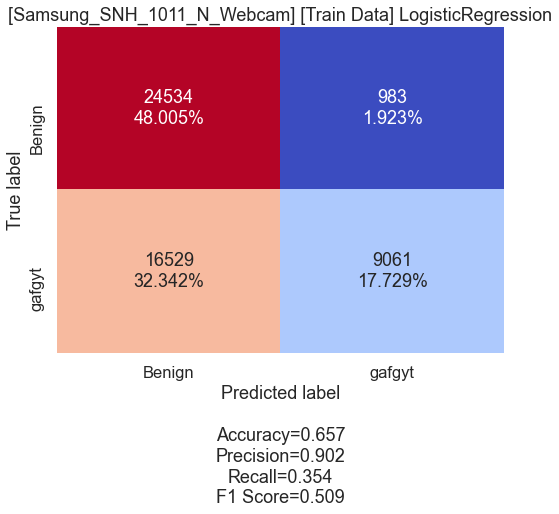


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.602     0.961     0.740     10961
           2      0.902     0.363     0.517     10942

    accuracy                          0.662     21903
   macro avg      0.752     0.662     0.629     21903
weighted avg      0.752     0.662     0.629     21903



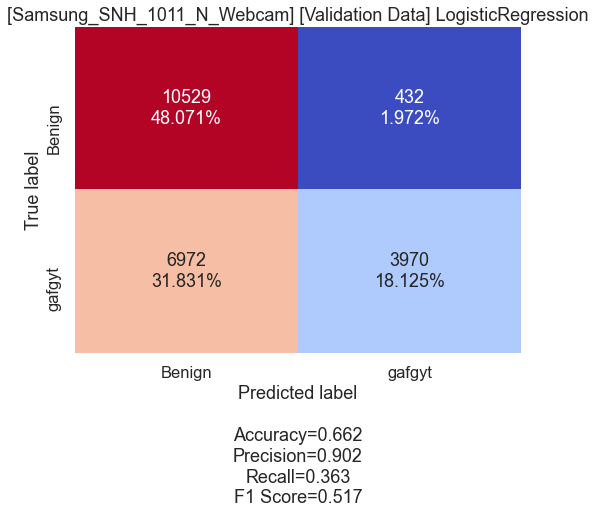


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.597     0.964     0.737     15672
           2      0.904     0.346     0.501     15618

    accuracy                          0.655     31290
   macro avg      0.750     0.655     0.619     31290
weighted avg      0.750     0.655     0.619     31290



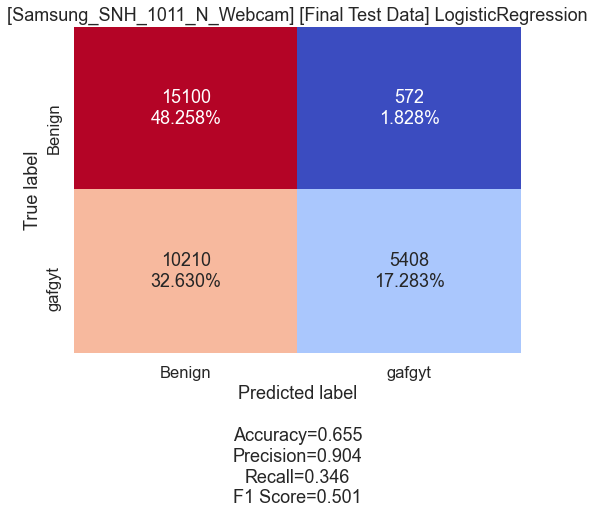

      Train:  Counter({0: 41063, 2: 10044})
 Validation:  Counter({0: 17501, 2: 4402})
       Test:  Counter({0: 25310, 2: 5980})
      Label:  Counter({0: 25310, 2: 5980})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25517
           2      1.000     1.000     1.000     25590

    accuracy                          1.000     51107
   macro avg      1.000     1.000     1.000     51107
weighted avg      1.000     1.000     1.000     51107



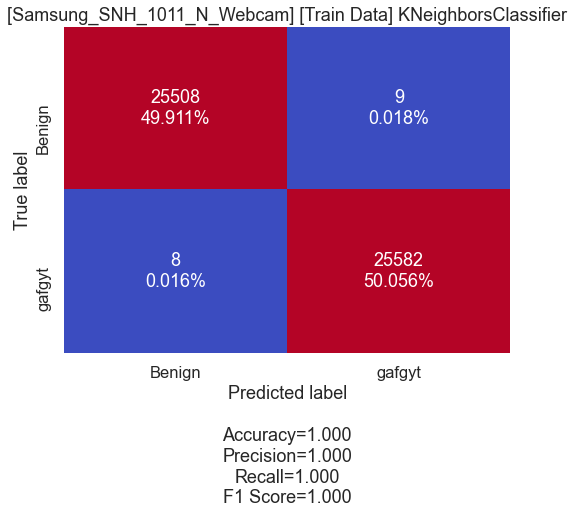


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     10961
           2      0.999     1.000     1.000     10942

    accuracy                          1.000     21903
   macro avg      1.000     1.000     1.000     21903
weighted avg      1.000     1.000     1.000     21903



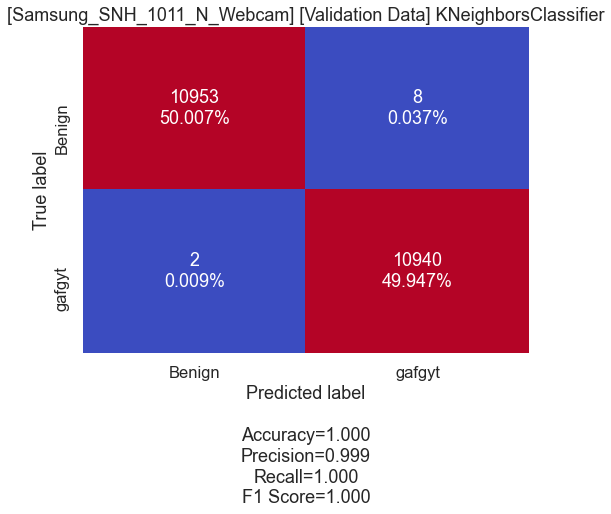


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     15672
           2      1.000     0.999     0.999     15618

    accuracy                          0.999     31290
   macro avg      0.999     0.999     0.999     31290
weighted avg      0.999     0.999     0.999     31290



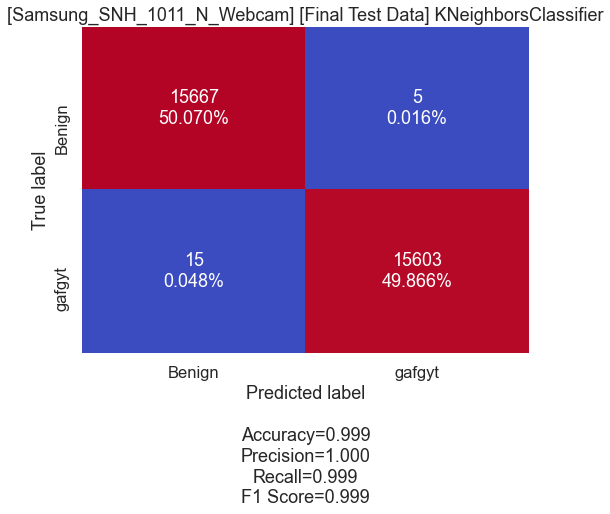

      Train:  Counter({2: 25591, 0: 25516})
 Validation:  Counter({0: 10955, 2: 10948})
       Test:  Counter({0: 15682, 2: 15608})
      Label:  Counter({0: 15682, 2: 15608})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25517
           2      1.000     1.000     1.000     25590

    accuracy                          1.000     51107
   macro avg      1.000     1.000     1.000     51107
weighted avg      1.000     1.000     1.000     51107



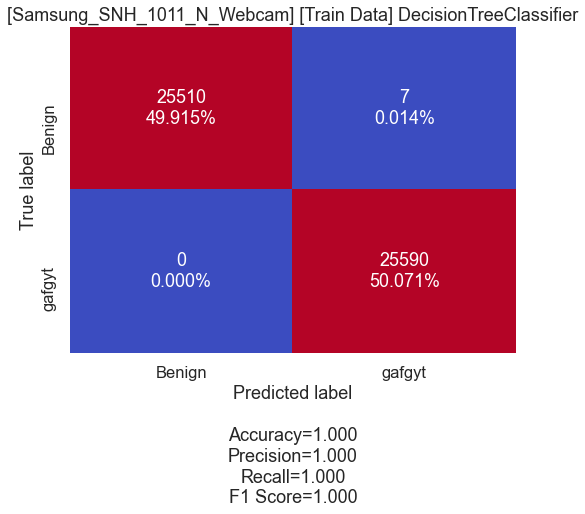


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     10961
           2      0.999     1.000     1.000     10942

    accuracy                          1.000     21903
   macro avg      1.000     1.000     1.000     21903
weighted avg      1.000     1.000     1.000     21903



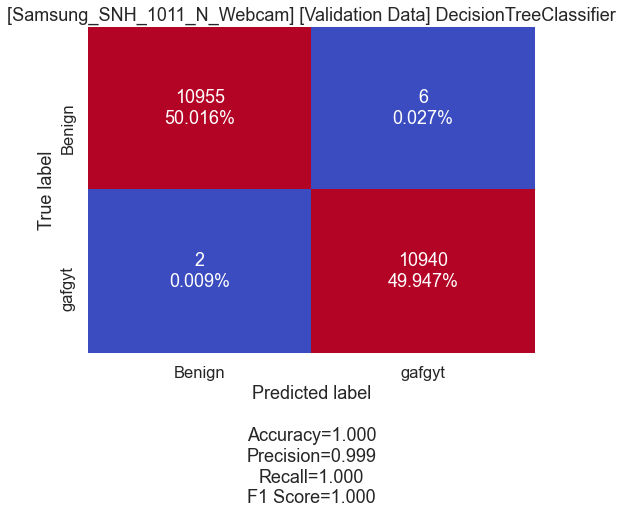


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999     15672
           2      0.999     0.999     0.999     15618

    accuracy                          0.999     31290
   macro avg      0.999     0.999     0.999     31290
weighted avg      0.999     0.999     0.999     31290



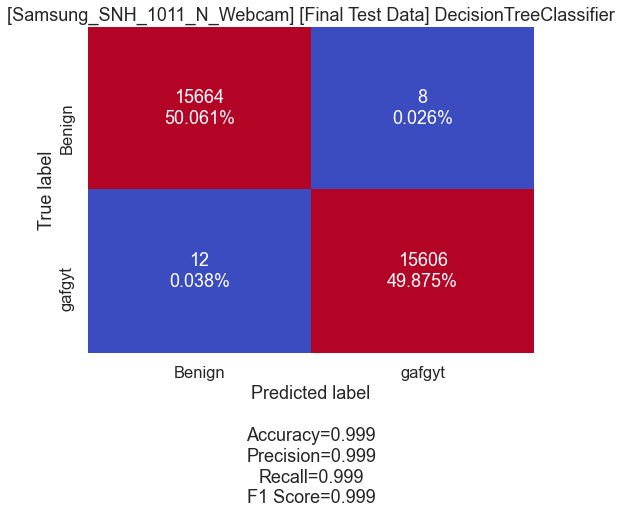

      Train:  Counter({2: 25597, 0: 25510})
 Validation:  Counter({0: 10957, 2: 10946})
       Test:  Counter({0: 15676, 2: 15614})
      Label:  Counter({0: 15676, 2: 15614})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25517
           2      1.000     1.000     1.000     25590

    accuracy                          1.000     51107
   macro avg      1.000     1.000     1.000     51107
weighted avg      1.000     1.000     1.000     51107



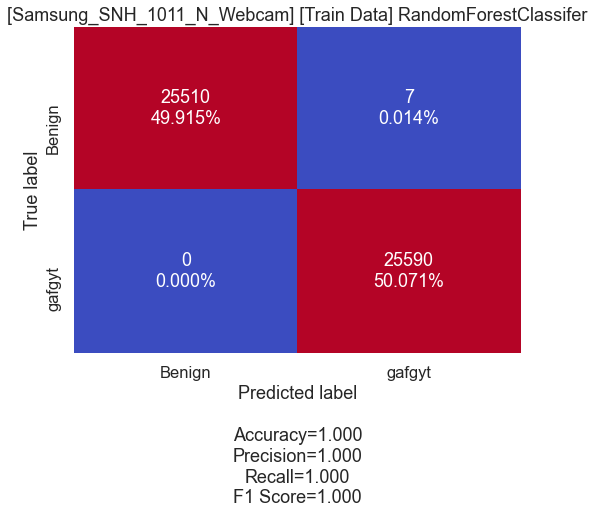


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     10961
           2      0.999     1.000     1.000     10942

    accuracy                          1.000     21903
   macro avg      1.000     1.000     1.000     21903
weighted avg      1.000     1.000     1.000     21903



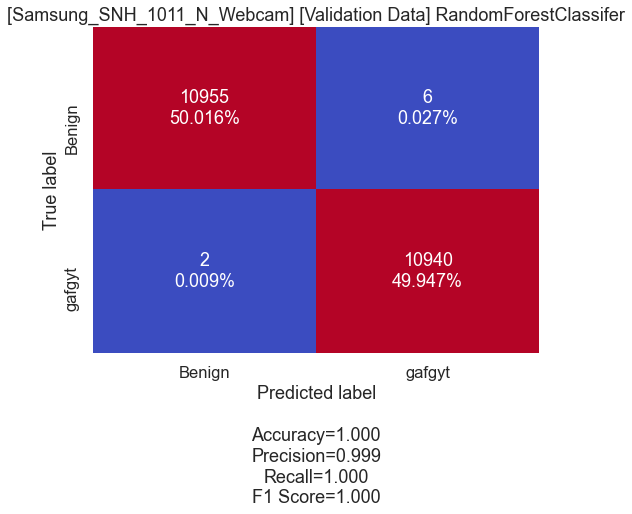


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     15672
           2      1.000     0.999     1.000     15618

    accuracy                          1.000     31290
   macro avg      1.000     1.000     1.000     31290
weighted avg      1.000     1.000     1.000     31290



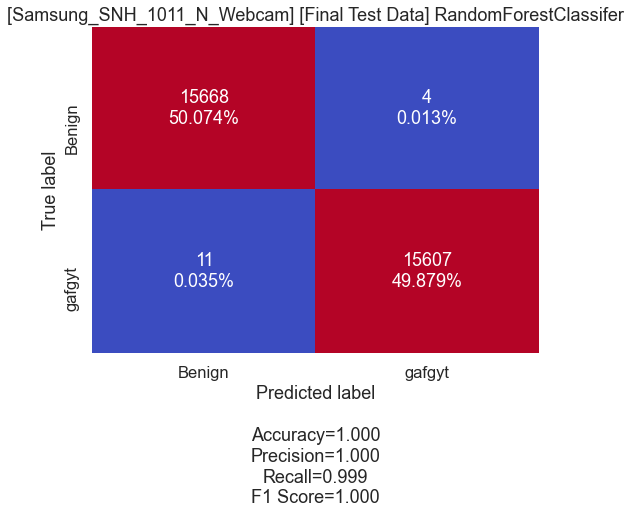

      Train:  Counter({2: 25597, 0: 25510})
 Validation:  Counter({0: 10957, 2: 10946})
       Test:  Counter({0: 15679, 2: 15611})
      Label:  Counter({0: 15672, 2: 15618})




***** [Samsung_SNH_1011_N_Webcam] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     25517
           2      1.000     1.000     1.000     25590

    accuracy                          1.000     51107
   macro avg      1.000     1.000     1.000     51107
weighted avg      1.000     1.000     1.000     51107



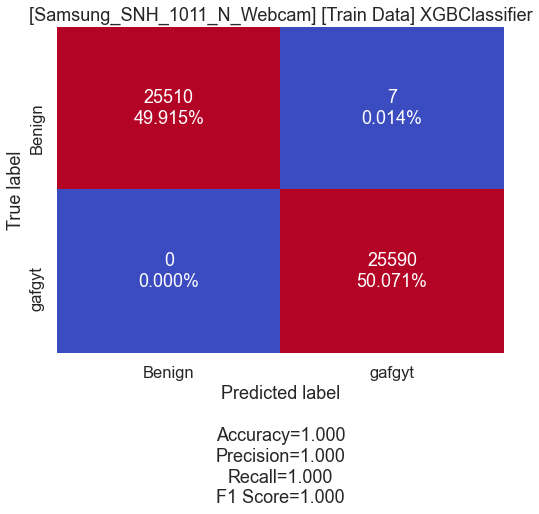


***** [Samsung_SNH_1011_N_Webcam] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000     10961
           2      0.999     1.000     1.000     10942

    accuracy                          1.000     21903
   macro avg      1.000     1.000     1.000     21903
weighted avg      1.000     1.000     1.000     21903



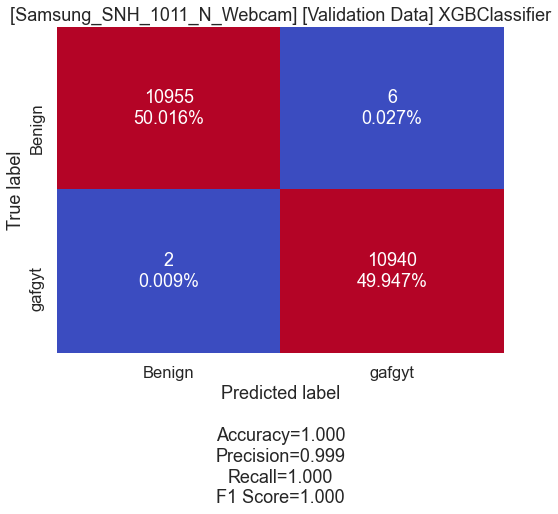


***** [Samsung_SNH_1011_N_Webcam] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     15672
           2      1.000     0.999     1.000     15618

    accuracy                          1.000     31290
   macro avg      1.000     1.000     1.000     31290
weighted avg      1.000     1.000     1.000     31290



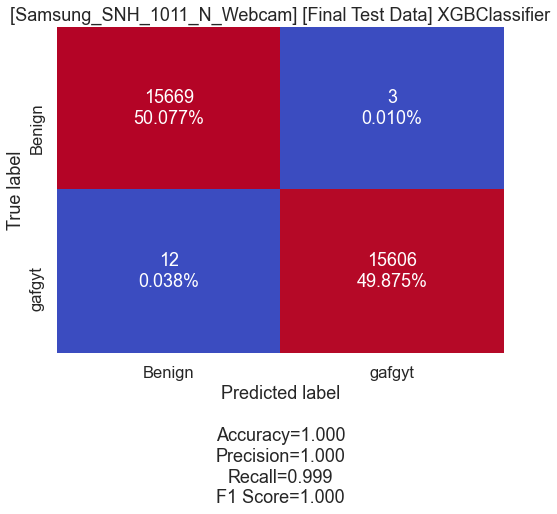

      Train:  Counter({2: 25597, 0: 25510})
 Validation:  Counter({0: 10957, 2: 10946})
       Test:  Counter({0: 15681, 2: 15609})
      Label:  Counter({0: 15672, 2: 15618})





In [26]:
# Read the pickle file or intantiate IoT_Device
SAMSUNG_iot = read_device_pickle(SAMSUNG_1011N_WEBCAM )    
if SAMSUNG_iot == None:
    # Instantiate class IoT_Device
    SAMSUNG_iot = IoT_Device(SAMSUNG_1011N_WEBCAM )
    
    #Pickle the object
    write_device_pickle(SAMSUNG_iot, SAMSUNG_1011N_WEBCAM )
model_factory(SAMSUNG_iot)

# 8) SimpleHome XCS7-1002WHT Security Camera

Ready to pickle the device ..  Shape: 139755
Pickled  ../../data_prep/SimpleHome_XCS7_1002_WHT_Security_Camera.pkl

***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.609     0.993     0.755     22848
           1      0.998     0.996     0.997     22732
           2      0.975     0.361     0.527     22899

    accuracy                          0.783     68479
   macro avg      0.860     0.784     0.760     68479
weighted avg      0.860     0.783     0.759     68479



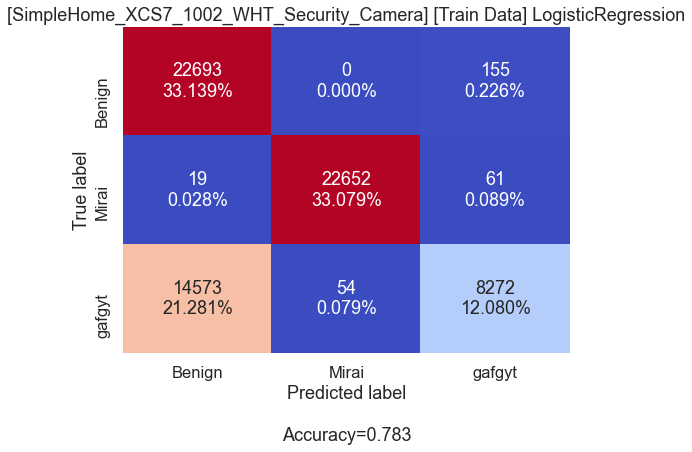


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.614     0.992     0.758      9841
           1      0.998     0.996     0.997      9797
           2      0.971     0.366     0.532      9711

    accuracy                          0.786     29349
   macro avg      0.861     0.785     0.762     29349
weighted avg      0.860     0.786     0.763     29349



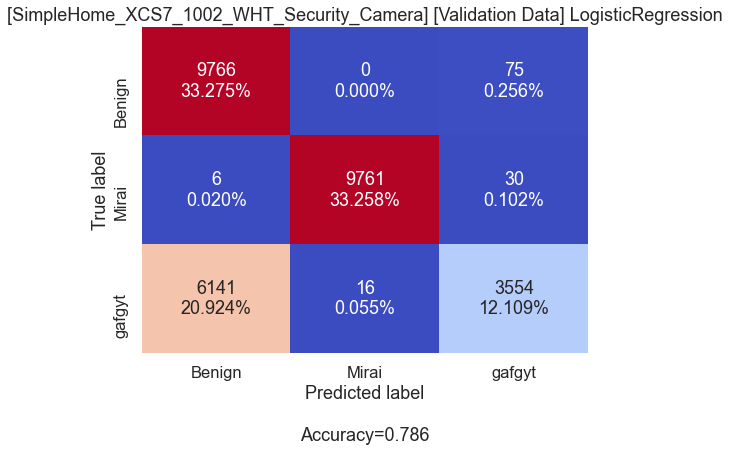


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.608     0.994     0.754     13896
           1      0.998     0.997     0.997     14056
           2      0.977     0.360     0.526     13975

    accuracy                          0.783     41927
   macro avg      0.861     0.783     0.759     41927
weighted avg      0.861     0.783     0.759     41927



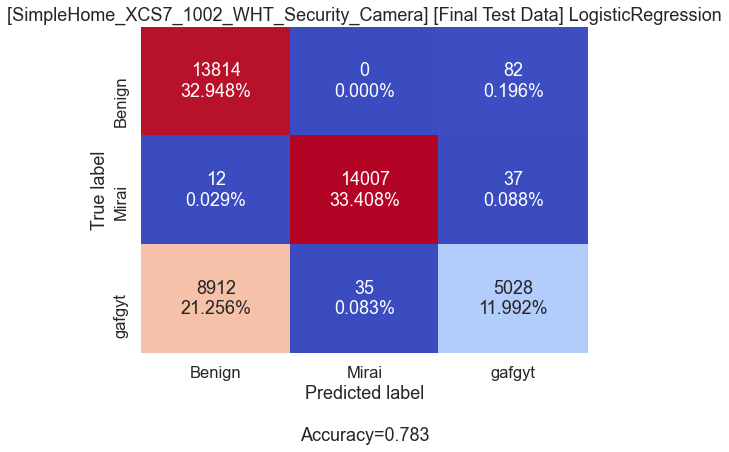

      Train:  Counter({0: 37285, 1: 22706, 2: 8488})
 Validation:  Counter({0: 15913, 1: 9777, 2: 3659})
       Test:  Counter({0: 22738, 1: 14042, 2: 5147})
      Label:  Counter({0: 22738, 1: 14042, 2: 5147})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     22848
           1      0.999     1.000     1.000     22732
           2      0.999     0.999     0.999     22899

    accuracy                          0.999     68479
   macro avg      0.999     0.999     0.999     68479
weighted avg      0.999     0.999     0.999     68479



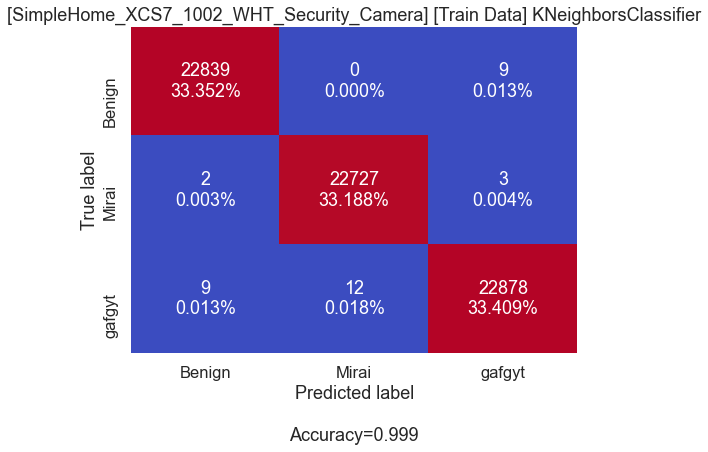


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999      9841
           1      0.999     1.000     0.999      9797
           2      1.000     0.998     0.999      9711

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



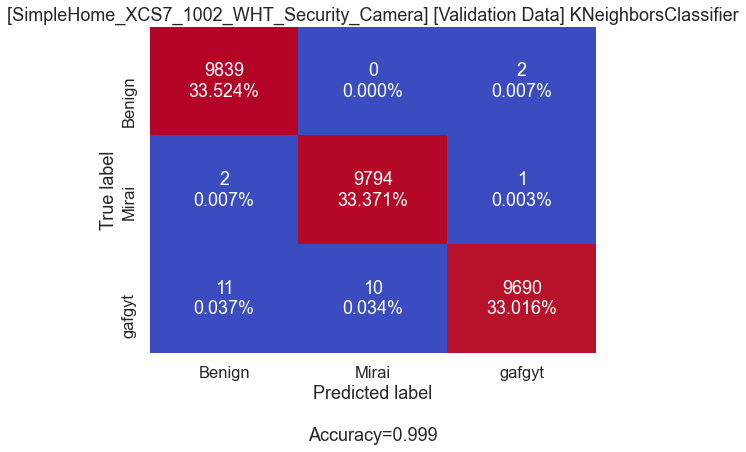


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     13896
           1      0.999     1.000     0.999     14056
           2      0.999     0.998     0.999     13975

    accuracy                          0.999     41927
   macro avg      0.999     0.999     0.999     41927
weighted avg      0.999     0.999     0.999     41927



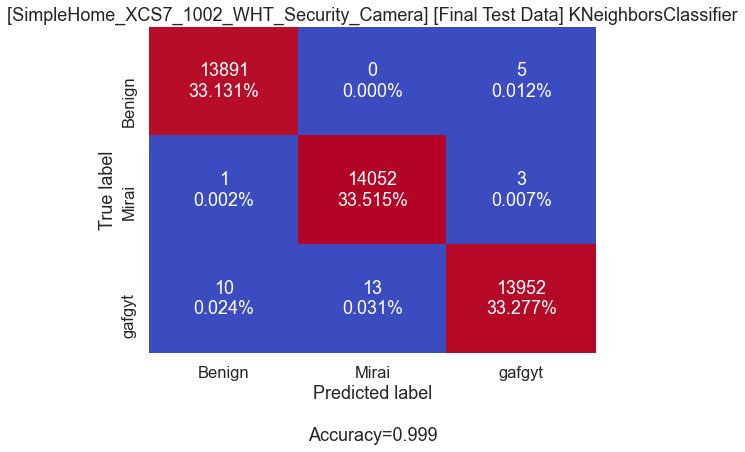

      Train:  Counter({2: 22890, 0: 22850, 1: 22739})
 Validation:  Counter({0: 9852, 1: 9804, 2: 9693})
       Test:  Counter({1: 14065, 2: 13960, 0: 13902})
      Label:  Counter({1: 14065, 2: 13960, 0: 13902})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     22848
           1      1.000     1.000     1.000     22732
           2      1.000     1.000     1.000     22899

    accuracy                          1.000     68479
   macro avg      1.000     1.000     1.000     68479
weighted avg      1.000     1.000     1.000     68479



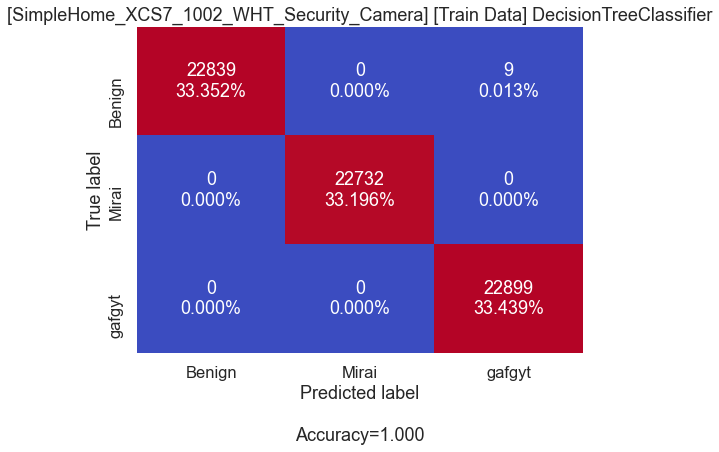


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999      9841
           1      0.999     0.999     0.999      9797
           2      0.999     0.998     0.999      9711

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



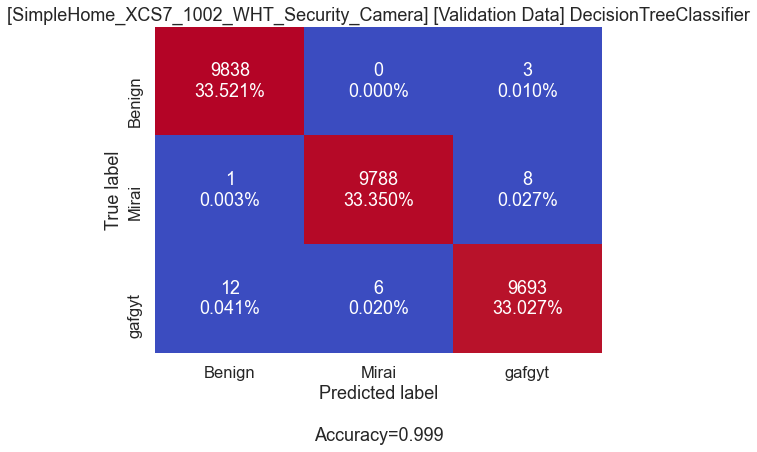


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     13896
           1      0.999     1.000     1.000     14056
           2      0.999     0.999     0.999     13975

    accuracy                          0.999     41927
   macro avg      0.999     0.999     0.999     41927
weighted avg      0.999     0.999     0.999     41927



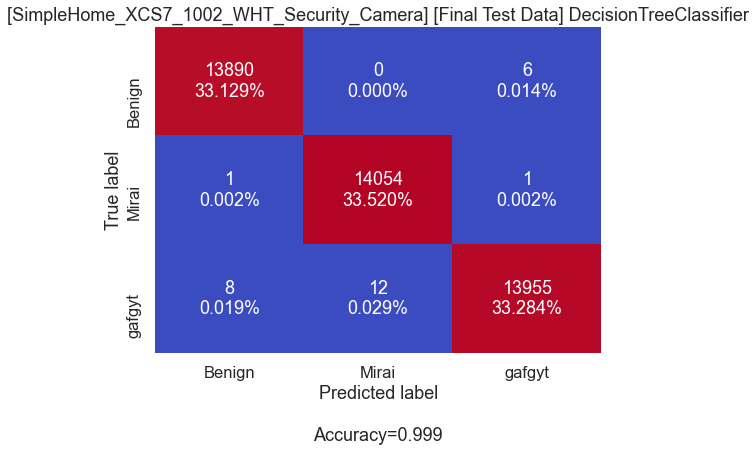

      Train:  Counter({2: 22908, 0: 22839, 1: 22732})
 Validation:  Counter({0: 9851, 1: 9794, 2: 9704})
       Test:  Counter({1: 14066, 2: 13962, 0: 13899})
      Label:  Counter({1: 14066, 2: 13962, 0: 13899})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     22848
           1      1.000     1.000     1.000     22732
           2      1.000     1.000     1.000     22899

    accuracy                          1.000     68479
   macro avg      1.000     1.000     1.000     68479
weighted avg      1.000     1.000     1.000     68479



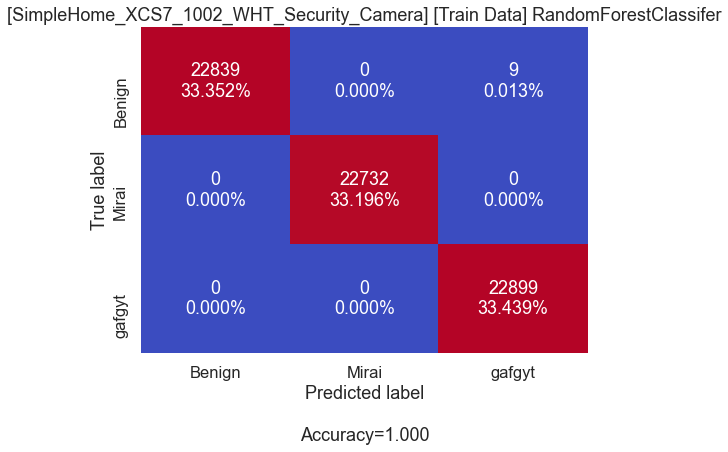


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999      9841
           1      1.000     1.000     1.000      9797
           2      1.000     0.998     0.999      9711

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



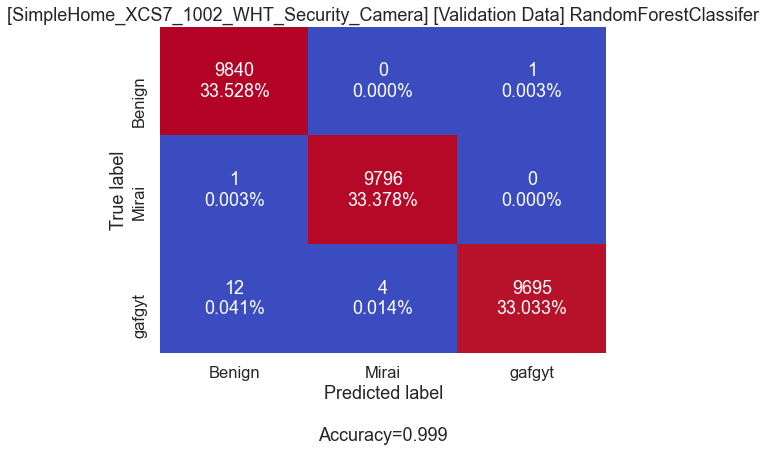


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999     13896
           1      1.000     1.000     1.000     14056
           2      1.000     0.999     0.999     13975

    accuracy                          1.000     41927
   macro avg      1.000     1.000     1.000     41927
weighted avg      1.000     1.000     1.000     41927



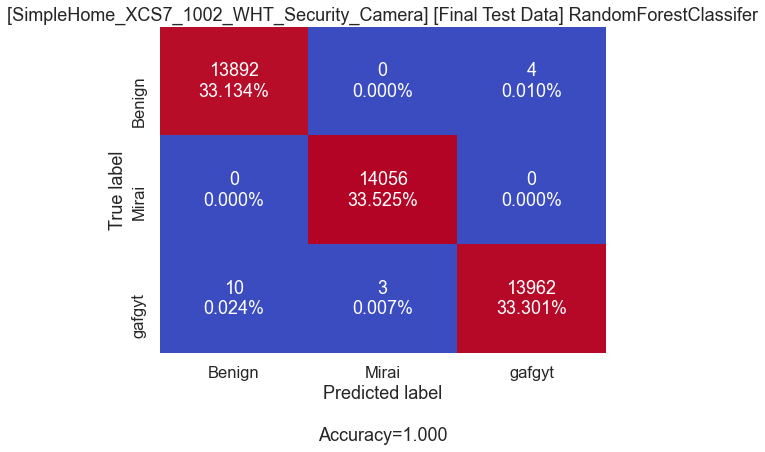

      Train:  Counter({2: 22908, 0: 22839, 1: 22732})
 Validation:  Counter({0: 9853, 1: 9800, 2: 9696})
       Test:  Counter({1: 14059, 2: 13966, 0: 13902})
      Label:  Counter({1: 14056, 2: 13975, 0: 13896})




***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     1.000     1.000     22848
           1      1.000     1.000     1.000     22732
           2      1.000     1.000     1.000     22899

    accuracy                          1.000     68479
   macro avg      1.000     1.000     1.000     68479
weighted avg      1.000     1.000     1.000     68479



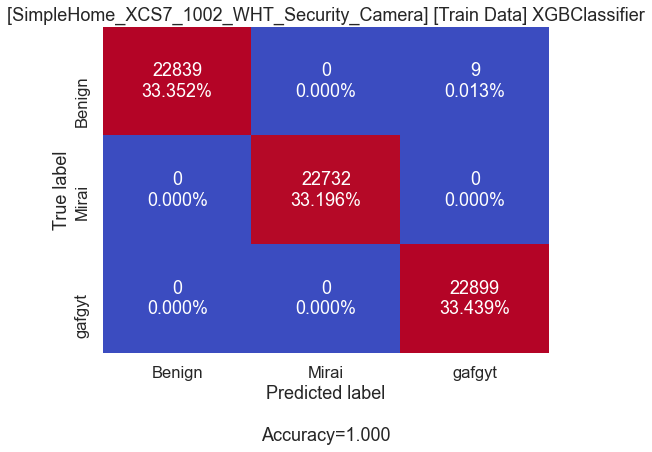


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     0.999      9841
           1      1.000     1.000     1.000      9797
           2      1.000     0.998     0.999      9711

    accuracy                          0.999     29349
   macro avg      0.999     0.999     0.999     29349
weighted avg      0.999     0.999     0.999     29349



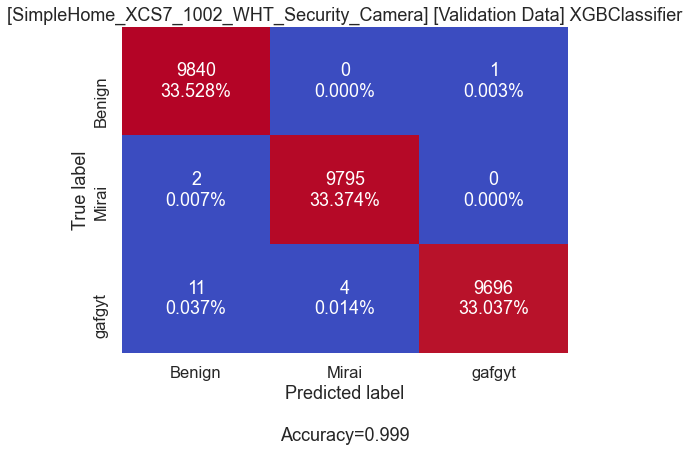


***** [SimpleHome_XCS7_1002_WHT_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     1.000     1.000     13896
           1      1.000     1.000     1.000     14056
           2      1.000     0.999     0.999     13975

    accuracy                          1.000     41927
   macro avg      1.000     1.000     1.000     41927
weighted avg      1.000     1.000     1.000     41927



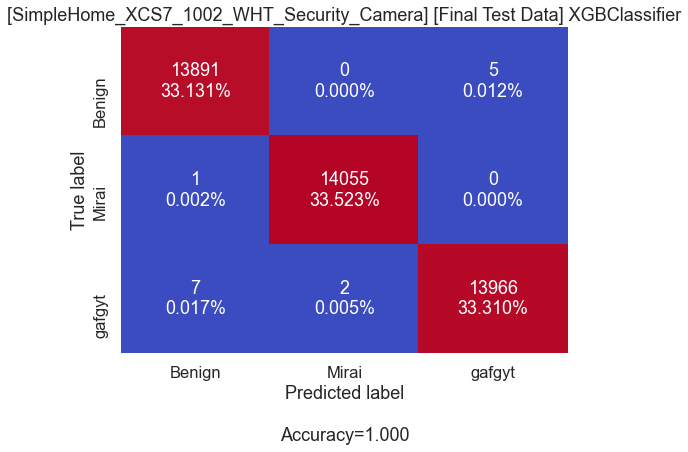

      Train:  Counter({2: 22908, 0: 22839, 1: 22732})
 Validation:  Counter({0: 9853, 1: 9799, 2: 9697})
       Test:  Counter({1: 14057, 2: 13971, 0: 13899})
      Label:  Counter({1: 14056, 2: 13975, 0: 13896})





In [27]:
# Read the pickle file or intantiate IoT_Device
XCS7_1002_iot = read_device_pickle(SIMPLEHOME_1002_SECURITY_CAMERA )    
if XCS7_1002_iot == None:
    # Instantiate class IoT_Device
    XCS7_1002_iot = IoT_Device(SIMPLEHOME_1002_SECURITY_CAMERA )
    
    #Pickle the object
    write_device_pickle(XCS7_1002_iot, SIMPLEHOME_1002_SECURITY_CAMERA )
model_factory(XCS7_1002_iot)

# 9) SimpleHome XCS7-1003WHT Security Camera

Ready to pickle the device ..  Shape: 58584
Pickled  ../../data_prep/SimpleHome_XCS7_1003_WHT_Security_Camera.pkl

***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.612     1.000     0.760      9560
           1      0.997     0.994     0.995      9638
           2      0.984     0.360     0.527      9507

    accuracy                          0.786     28705
   macro avg      0.864     0.785     0.761     28705
weighted avg      0.864     0.786     0.762     28705



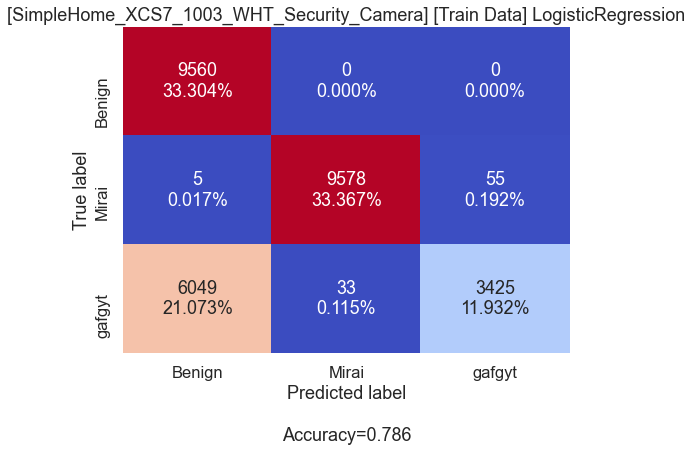


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.601     1.000     0.751      4093
           1      0.993     0.994     0.994      4002
           2      0.986     0.350     0.516      4208

    accuracy                          0.776     12303
   macro avg      0.860     0.781     0.754     12303
weighted avg      0.860     0.776     0.750     12303



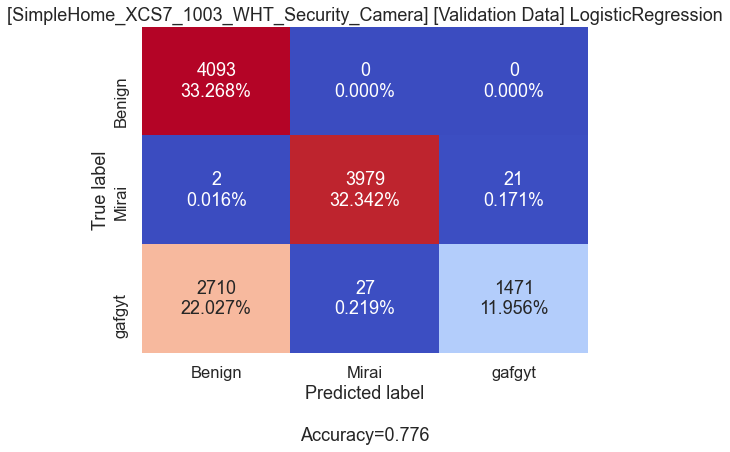


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] LogisticRegression *****

              precision    recall  f1-score   support

           0      0.619     1.000     0.764      5875
           1      0.997     0.995     0.996      5888
           2      0.986     0.373     0.542      5813

    accuracy                          0.791     17576
   macro avg      0.867     0.789     0.767     17576
weighted avg      0.867     0.791     0.768     17576



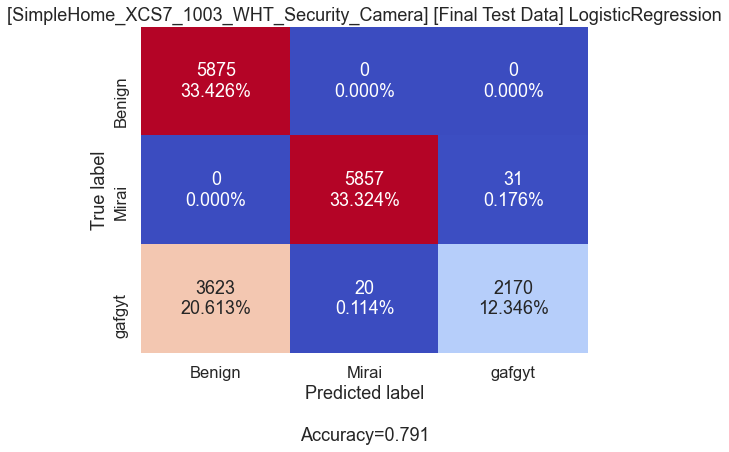

      Train:  Counter({0: 15614, 1: 9611, 2: 3480})
 Validation:  Counter({0: 6805, 1: 4006, 2: 1492})
       Test:  Counter({0: 9498, 1: 5877, 2: 2201})
      Label:  Counter({0: 9498, 1: 5877, 2: 2201})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      9560
           1      0.999     0.999     0.999      9638
           2      0.998     0.998     0.998      9507

    accuracy                          0.998     28705
   macro avg      0.998     0.998     0.998     28705
weighted avg      0.998     0.998     0.998     28705



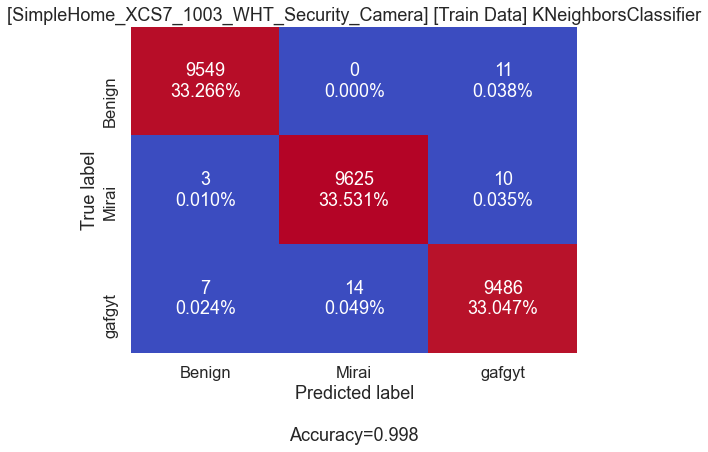


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.998     0.999     0.999      4093
           1      0.998     0.999     0.998      4002
           2      0.998     0.997     0.998      4208

    accuracy                          0.998     12303
   macro avg      0.998     0.998     0.998     12303
weighted avg      0.998     0.998     0.998     12303



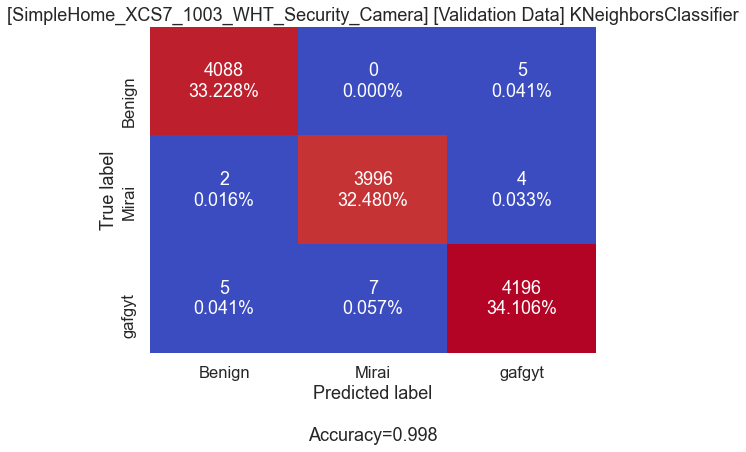


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] KNeighborsClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      5875
           1      0.998     0.999     0.999      5888
           2      0.997     0.997     0.997      5813

    accuracy                          0.998     17576
   macro avg      0.998     0.998     0.998     17576
weighted avg      0.998     0.998     0.998     17576



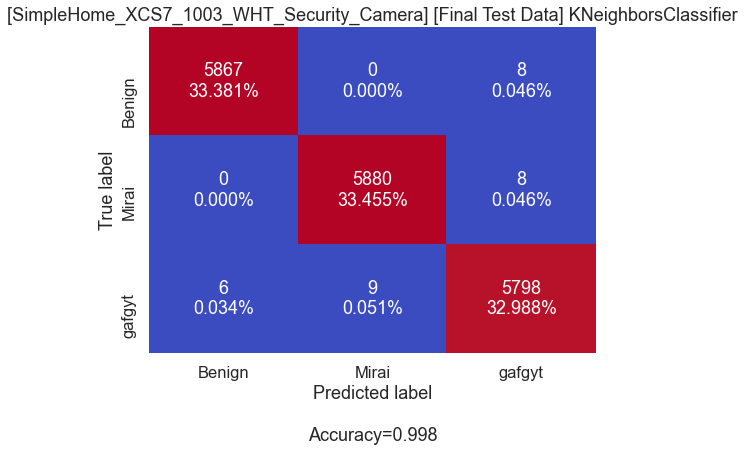

      Train:  Counter({1: 9639, 0: 9559, 2: 9507})
 Validation:  Counter({2: 4205, 0: 4095, 1: 4003})
       Test:  Counter({1: 5889, 0: 5873, 2: 5814})
      Label:  Counter({1: 5889, 0: 5873, 2: 5814})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      9560
           1      1.000     1.000     1.000      9638
           2      0.999     1.000     0.999      9507

    accuracy                          1.000     28705
   macro avg      1.000     1.000     1.000     28705
weighted avg      1.000     1.000     1.000     28705



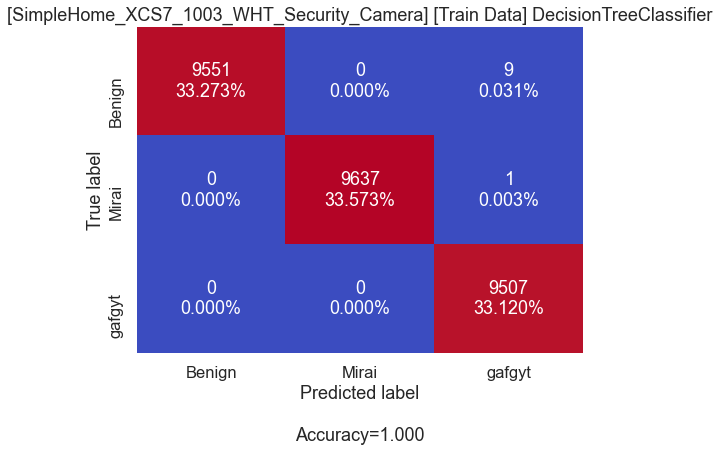


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.998     0.999     0.999      4093
           1      0.997     0.999     0.998      4002
           2      0.998     0.996     0.997      4208

    accuracy                          0.998     12303
   macro avg      0.998     0.998     0.998     12303
weighted avg      0.998     0.998     0.998     12303



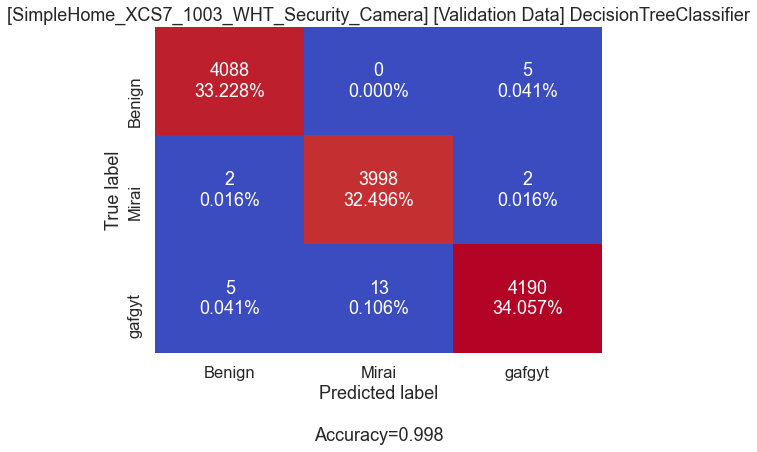


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] DecisionTreeClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      5875
           1      0.997     1.000     0.998      5888
           2      0.999     0.997     0.998      5813

    accuracy                          0.998     17576
   macro avg      0.998     0.998     0.998     17576
weighted avg      0.998     0.998     0.998     17576



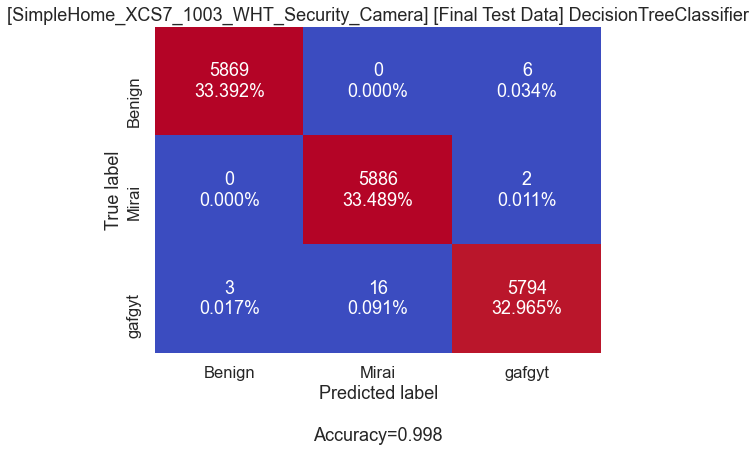

      Train:  Counter({1: 9637, 0: 9551, 2: 9517})
 Validation:  Counter({2: 4197, 0: 4095, 1: 4011})
       Test:  Counter({1: 5902, 0: 5872, 2: 5802})
      Label:  Counter({1: 5902, 0: 5872, 2: 5802})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      9560
           1      1.000     1.000     1.000      9638
           2      0.999     1.000     0.999      9507

    accuracy                          1.000     28705
   macro avg      1.000     1.000     1.000     28705
weighted avg      1.000     1.000     1.000     28705



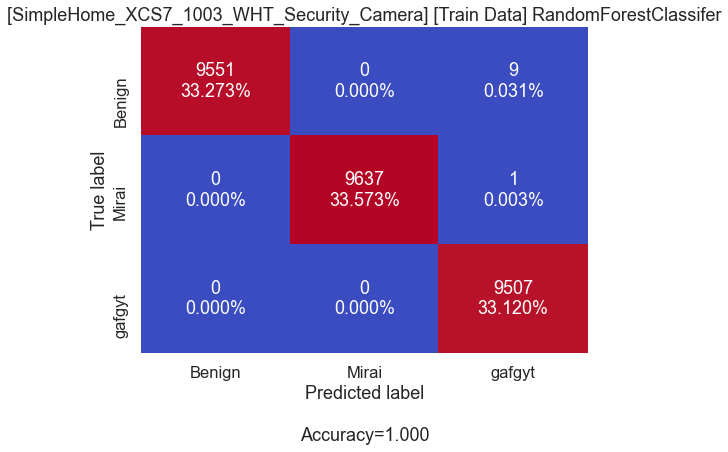


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.998     0.999     0.999      4093
           1      0.999     0.999     0.999      4002
           2      0.999     0.998     0.998      4208

    accuracy                          0.999     12303
   macro avg      0.999     0.999     0.999     12303
weighted avg      0.999     0.999     0.999     12303



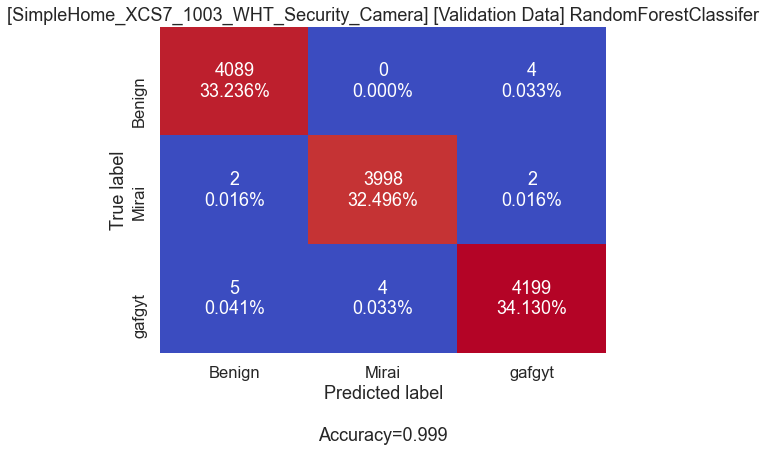


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] RandomForestClassifer *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      5875
           1      0.999     0.999     0.999      5888
           2      0.999     0.998     0.998      5813

    accuracy                          0.999     17576
   macro avg      0.999     0.999     0.999     17576
weighted avg      0.999     0.999     0.999     17576



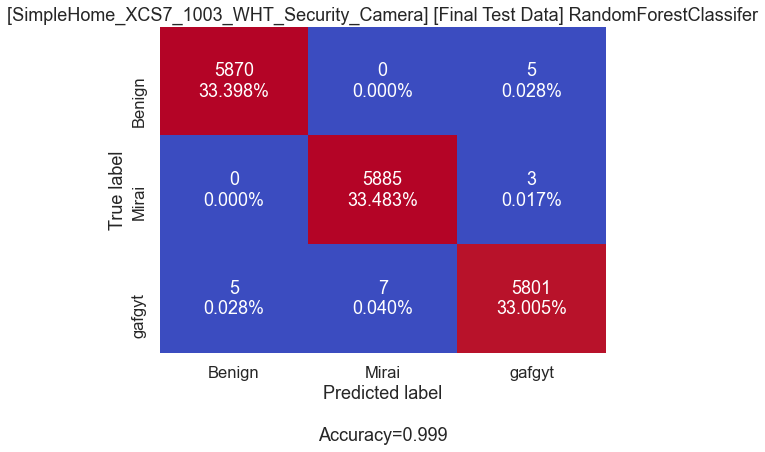

      Train:  Counter({1: 9637, 0: 9551, 2: 9517})
 Validation:  Counter({2: 4205, 0: 4096, 1: 4002})
       Test:  Counter({1: 5892, 0: 5875, 2: 5809})
      Label:  Counter({1: 5888, 0: 5875, 2: 5813})




***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Train Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      1.000     0.999     1.000      9560
           1      1.000     1.000     1.000      9638
           2      0.999     1.000     0.999      9507

    accuracy                          1.000     28705
   macro avg      1.000     1.000     1.000     28705
weighted avg      1.000     1.000     1.000     28705



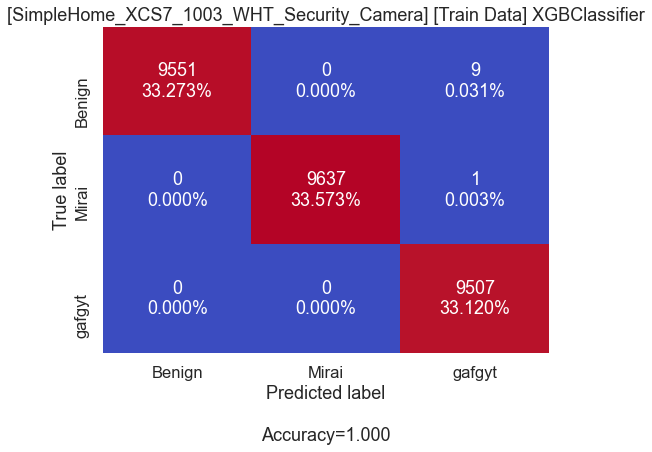


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Validation Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.998     0.999     0.999      4093
           1      0.998     0.999     0.998      4002
           2      0.999     0.997     0.998      4208

    accuracy                          0.998     12303
   macro avg      0.998     0.998     0.998     12303
weighted avg      0.998     0.998     0.998     12303



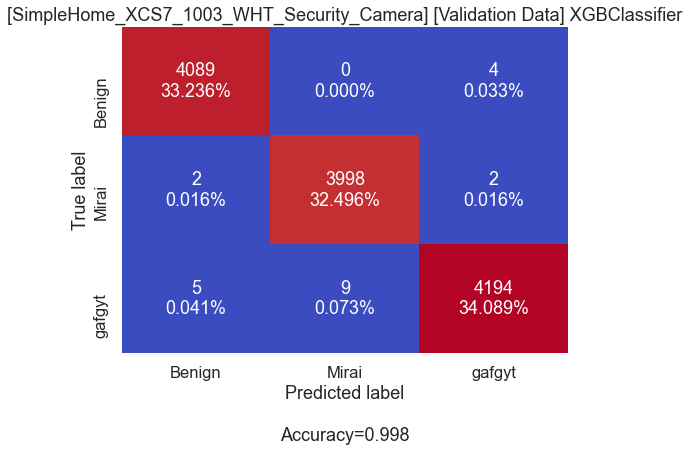


***** [SimpleHome_XCS7_1003_WHT_Security_Camera] [Final Test Data] XGBClassifier *****

              precision    recall  f1-score   support

           0      0.999     0.999     0.999      5875
           1      0.998     0.999     0.999      5888
           2      0.998     0.998     0.998      5813

    accuracy                          0.999     17576
   macro avg      0.999     0.999     0.999     17576
weighted avg      0.999     0.999     0.999     17576



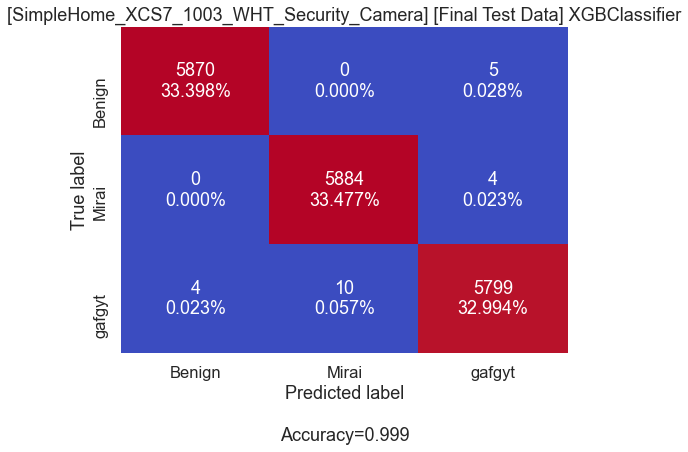

      Train:  Counter({1: 9637, 0: 9551, 2: 9517})
 Validation:  Counter({2: 4200, 0: 4096, 1: 4007})
       Test:  Counter({1: 5894, 0: 5874, 2: 5808})
      Label:  Counter({1: 5888, 0: 5875, 2: 5813})





In [28]:
# Read the pickle file or intantiate IoT_Device
XCS7_1003_iot = read_device_pickle(SIMPLEHOME_1003_SECURITY_CAMERA )    
if XCS7_1003_iot == None:
    # Instantiate class IoT_Device
    XCS7_1003_iot = IoT_Device(SIMPLEHOME_1003_SECURITY_CAMERA )
    
    #Pickle the object
    write_device_pickle(XCS7_1003_iot, SIMPLEHOME_1003_SECURITY_CAMERA)
model_factory(XCS7_1003_iot)

## Create a list of all IoT_Device instantiated class variables
> This list is used in a loop to iterate through all devices

In [29]:
#list of all IoT_Devices intantiated class variable
iot_classObjs = [damini_iot, ennino_iot, ecobee_iot, B120N10_iot, SAMSUNG_iot, PT737E_iot, PT838_iot, XCS7_1002_iot, XCS7_1003_iot]

[Text(0.5, 0, '')]

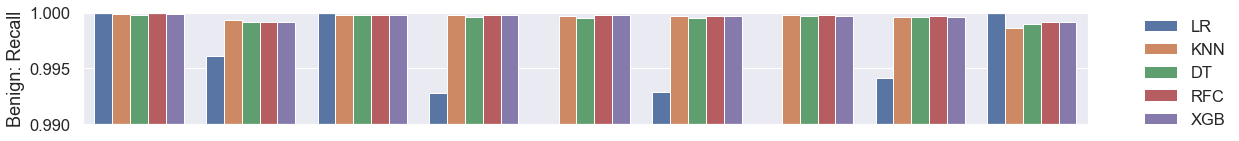

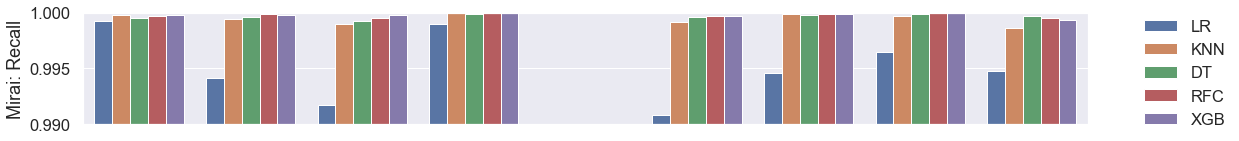

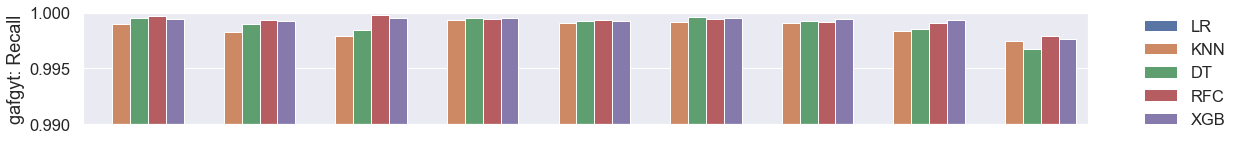

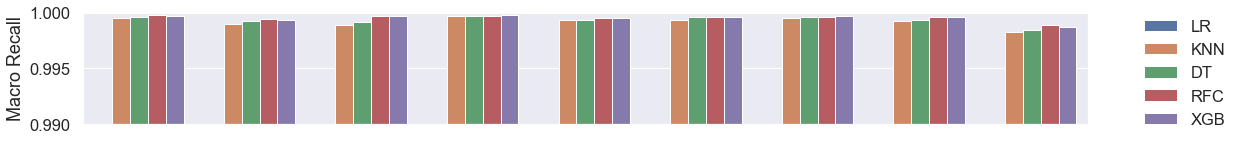

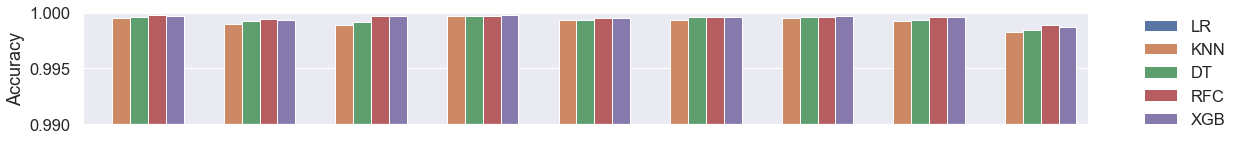

In [30]:
df = pd.DataFrame()
for item, device in enumerate(DEVICE_LST):
    iot = iot_classObjs[item]
    df = df.append(iot.lg_model_score, ignore_index=True)
    df = df.append(iot.knn_model_score, ignore_index=True)
    df = df.append(iot.dt_model_score, ignore_index=True)
    df =  df.append(iot.rfc_model_score, ignore_index=True)
    df = df.append(iot.xgb_model_score, ignore_index=True)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_0', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Benign: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_1', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Mirai: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_2
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_2', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'gafgyt: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Macro Recall
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Macro_Recall', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Macro Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Accuracy
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Accuracy', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Accuracy')
ss.set(xticklabels=[])
ss.set(xlabel=None)


[Text(0.5, 0, '')]

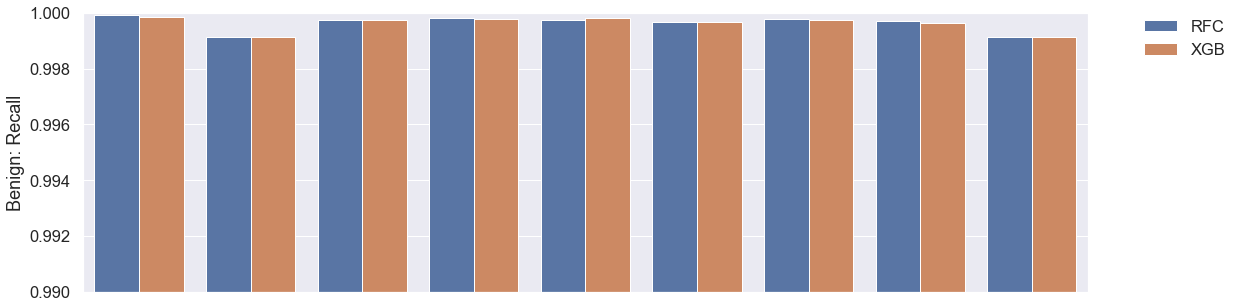

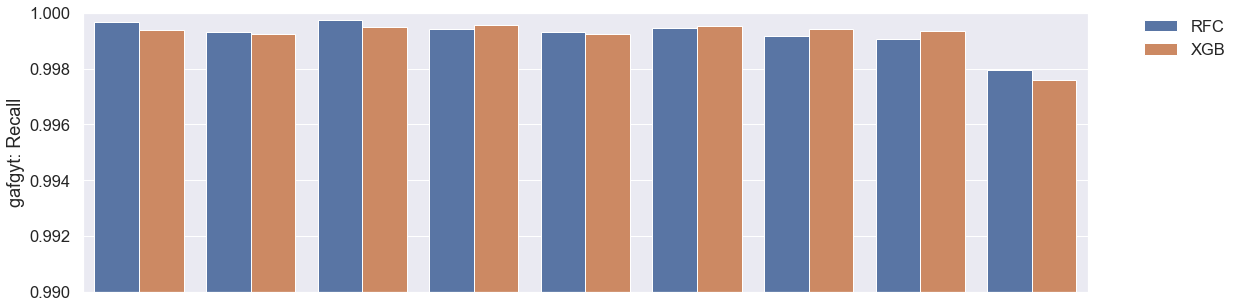

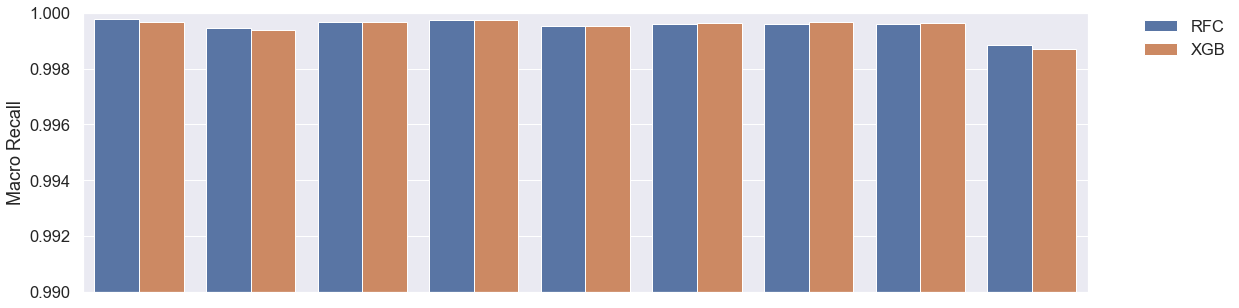

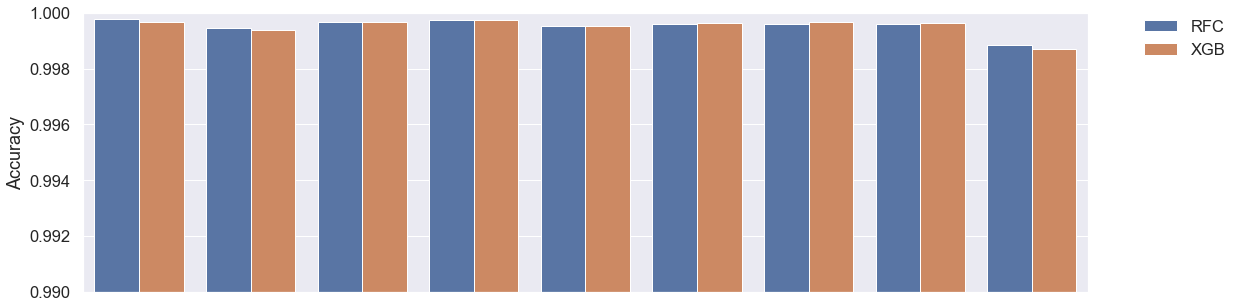

In [31]:
df = pd.DataFrame()
for item, device in enumerate(DEVICE_LST):
    iot = iot_classObjs[item]

    df =  df.append(iot.rfc_model_score, ignore_index=True)
    df = df.append(iot.xgb_model_score, ignore_index=True)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_0', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Benign: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_0
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_1', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.99, 1.0))
ss.set(ylabel = 'Mirai: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Recall_2
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Recall_2', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'gafgyt: Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Macro Recall
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Macro_Recall', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Macro Recall')
ss.set(xticklabels=[])
ss.set(xlabel=None)

# print Accuracy
plt.figure(figsize=(18, 10))
ss = sns.barplot(x = 'Device', y = 'Accuracy', hue='Model', data = df, ci=None);
ss.set_box_aspect(5/len(ss.patches)) #change 10 to modify the y/x axis ratio
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
ss.set(ylim=(0.990, 1.0))
ss.set(ylabel = 'Accuracy')
ss.set(xticklabels=[])
ss.set(xlabel=None)

In [33]:
print("Mean RFC Accuracy: ", np.mean(df[df['Model'] == "RFC"]['Accuracy']))

print("Mean RFC Macro REcall: ", np.mean(df[df['Model'] == "RFC"]['Macro_Recall']))

print("Mean XGB Accuracy: ", np.mean(df[df['Model'] == "XGB"]['Accuracy']))

print("Mean XGB Macro Recall: ", np.mean(df[df['Model'] == "XGB"]['Macro_Recall']))

# print( " Mean: Accuracy ", np.mean(df['Accuracy']))
# print( " Mean: Macro Recall", np.mean(df['Macro_Recall']))    


Mean RFC Accuracy:  0.9995348282024425
Mean RFC Macro REcall:  0.9995342976165976
Mean XGB Accuracy:  0.9995153009015303
Mean XGB Macro Recall:  0.9995144274867394


# * Best Model Evaluation * XGBoost *

> For each of the IoT device, do typeper parameter turning
  > "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] <BR>
  > "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],<BR>
  > "min_child_weight" : [ 1, 3, 5, 7 ],<BR>
  > "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],<BR>
  > "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]<BR>

## Call iot_xgboost_hyperparameter_tuning()  method in data_prep.py

In [34]:
'''
    Set XGBoost Hyperparameters and run RandomizedSearachCV to find the best parameters
'''
iot_classObjs = [damini_iot, ennino_iot, ecobee_iot, B120N10_iot, SAMSUNG_iot, PT737E_iot, PT838_iot, XCS7_1002_iot, XCS7_1003_iot]

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]}

for iot in iot_classObjs:
    iot.iot_xgboost_hyperparameter_tuning('recall', params)
#    iot.iot_xgboost_hyperparameter_tuning('accuracy', params)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.7min remaining:   31.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished



 Time taken: 0 hours 2 minutes and 12.11 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=6,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 6, 'learning_rate': 0.25, 'gamma': 0.0, 'colsample_bytree': 0.4}
Score:  [0.99986546 0.99966364 0.99959637 0.99973091 0.99966362 0.99979817
 0.99986545 0.99993272 0.99979817 0.99959634]
\XGBoost - Mean of Macro Recall scores: 0.9997510841201962
Fitting 5 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.8min remaining:   33.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.1min finished



 Time taken: 0 hours 2 minutes and 12.79 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=3,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.2, 'gamma': 0.3, 'colsample_bytree': 0.5}
Score:  [0.99986546 0.99966364 0.99959637 0.99973091 0.99966362 0.99979817
 0.99986545 0.99993272 0.99979817 0.99959634]

XGBoost - Mean of Accuracy scores:  0.9997510841201962
Fitting 5 folds

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.0min remaining:   38.2s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished



 Time taken: 0 hours 2 minutes and 33.6 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.2, 'gamma': 0.4, 'colsample_bytree': 0.7}
Score:  [0.99931799 0.99948849 0.99957374 0.9998295  0.99974425 0.99957374
 0.99965899 0.9998295  0.99948849 0.99948849]
\XGBoost - Mean of Macro Recall scores: 0.9995993179880648
Fitting 5 f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.3min remaining:   44.1s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.6min finished



 Time taken: 0 hours 2 minutes and 46.55 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 12, 'learning_rate': 0.3, 'gamma': 0.2, 'colsample_bytree': 0.7}
Score:  [0.99931799 0.99948849 0.99957374 0.9998295  0.99974425 0.99957374
 0.99965899 0.9998295  0.99948849 0.99948849]

XGBoost - Mean of Accuracy scores:  0.9995993179880648
Fitting 5 fol

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   39.9s remaining:   12.6s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   46.3s finished



 Time taken: 0 hours 0 minutes and 49.04 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.4}
Score:  [0.99974581 0.99949161 0.99923742 0.99898322 0.99847483 1.
 0.99974581 0.99898322 1.         0.99898296]
\XGBoost - Mean of Macro Recall scores: 0.9993644886366209
Fitting 5 folds fo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   21.2s remaining:    6.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   28.1s finished



 Time taken: 0 hours 0 minutes and 29.85 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 4, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.5}
Score:  [0.99974581 0.99949161 0.99923742 0.99898322 0.99847483 1.
 0.99974581 0.99898322 1.         0.99898296]

XGBoost - Mean of Accuracy scores:  0.9993644886366209
Fitting 5 folds for e

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 12.7min remaining:  4.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 14.0min finished



 Time taken: 0 hours 15 minutes and 39.76 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.05, 'gamma': 0.4, 'colsample_bytree': 0.7}
Score:  [0.99984783 0.99982881 0.99986685 0.99977174 0.99980978 0.99975272
 0.99996196 0.99980978 0.99984783 0.99977174]
\XGBoost - Mean of Macro Recall scores: 0.9998269040553908
Fitting

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 10.5min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 11.7min finished



 Time taken: 0 hours 12 minutes and 27.9 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.5}
Score:  [0.99984783 0.99982881 0.99986685 0.99977174 0.99980978 0.99975272
 0.99996196 0.99980978 0.99984783 0.99977174]

XGBoost - Mean of Accuracy scores:  0.9998269040553908
Fitting 5 f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   38.1s remaining:   12.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   43.1s finished



 Time taken: 0 hours 0 minutes and 45.5 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 8, 'learning_rate': 0.1, 'gamma': 0.0, 'colsample_bytree': 0.5}
Score:  [1.         0.99952061 0.99971237 0.99990412 0.99971237 0.9991371
 0.99961649 0.99952061 0.99971237 0.99952061]
\XGBoost - Mean of Macro Recall scores: 0.9996356663470756
Fitting 5 folds for each of 5 candidates, totalling 25 fits

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   33.8s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   38.9s finished



 Time taken: 0 hours 0 minutes and 41.26 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.5}
Score:  [1.         0.99952061 0.99971237 0.99990412 0.99971237 0.9991371
 0.99961649 0.99952061 0.99971237 0.99952061]

XGBoost - Mean of Accuracy scores:  0.9996356663470756
Fitting 5 folds for each of 5 candidates, totalling 25 fi

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  3.3min remaining:  1.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.0min finished



 Time taken: 0 hours 4 minutes and 20.45 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.2, 'colsample_bytree': 0.5}
Score:  [0.99967823 0.99989274 0.99978548 0.99973185 0.99983911 0.99967822
 0.99973185 0.99946369 0.99962458 0.99973185]
\XGBoost - Mean of Macro Recall scores: 0.9997157590315533
Fitting 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  4.2min remaining:  1.3min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.8min finished



 Time taken: 0 hours 5 minutes and 3.23 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 8, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.3}
Score:  [0.99967823 0.99989274 0.99978548 0.99973185 0.99983911 0.99967822
 0.99973185 0.99946369 0.99962458 0.99973185]

XGBoost - Mean of Accuracy scores:  0.9997157590315533
Fitting 5 folds 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  7.0min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.7min finished



 Time taken: 0 hours 9 minutes and 14.25 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.15, 'gamma': 0.0, 'colsample_bytree': 0.7}
Score:  [0.99956014 0.99976315 0.99993233 0.99983082 0.99979698 0.99979698
 0.99972931 0.99972931 0.99969547 0.99976315]
\XGBoost - Mean of Macro Recall scores: 0.9997597640816961
Fitting 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  5.8min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  6.5min finished



 Time taken: 0 hours 6 minutes and 55.71 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 7, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.3, 'colsample_bytree': 0.4}
Score:  [0.99956014 0.99976315 0.99993233 0.99983082 0.99979698 0.99979698
 0.99972931 0.99972931 0.99969547 0.99976315]

XGBoost - Mean of Accuracy scores:  0.9997597640816961
Fitting 5 f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.4min remaining:   44.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.6min finished



 Time taken: 0 hours 2 minutes and 45.87 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=12,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.3, 'gamma': 0.0, 'colsample_bytree': 0.5}
Score:  [0.99964224 0.99978535 0.99964224 0.99949914 0.99978535 0.99964222
 0.99978533 0.99964222 0.99971377 0.99942755]
\XGBoost - Mean of Macro Recall scores: 0.999656541292868
Fitting 5 f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.2min remaining:   41.7s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.3min finished



 Time taken: 0 hours 2 minutes and 30.77 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=12,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.25, 'gamma': 0.2, 'colsample_bytree': 0.3}
Score:  [0.99964224 0.99978535 0.99964224 0.99949914 0.99978535 0.99964222
 0.99978533 0.99964222 0.99971377 0.99942755]

XGBoost - Mean of Accuracy scores:  0.999656541292868
Fitting 5 fo

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   48.4s remaining:   15.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.0min finished



 Time taken: 0 hours 1 minutes and 5.94 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=15,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 5, 'max_depth': 15, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.7}
Score:  [0.99863458 0.99982932 0.99914661 0.99880526 0.99948788 0.99914647
 0.99948788 0.99846364 0.99897576 0.99829293]
\XGBoost - Mean of Macro Recall scores: 0.99902703284789
Fitting 5 f

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:   47.5s remaining:   15.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   59.5s finished



 Time taken: 0 hours 1 minutes and 2.28 seconds.

best_estimator_: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

best_params_: {'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.3, 'gamma': 0.1, 'colsample_bytree': 0.5}
Score:  [0.99863458 0.99982932 0.99914661 0.99880526 0.99948788 0.99914647
 0.99948788 0.99846364 0.99897576 0.99829293]

XGBoost - Mean of Accuracy scores:  0.99902703284789


In [ ]:
'''
Method Name: iot_xgboost_hyperparameter_tuning
    Input: self
    Returns: None
    Because I have a large dataset, let me put some timer while running parameter turning
    Loop through each of the 9 IoT devices to score on Recall.
'''
for iot in iot_classObjs:
    # Instantiate XGBClassifer()
    xgb = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
                  colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
                  importance_type='gain', interaction_constraints='',
                  learning_rate=0.25, max_delta_step=0, max_depth=8,
                  min_child_weight=1,  monotone_constraints='()',
                  n_estimators=100, n_jobs=0, num_parallel_tree=1,
                  objective='multi:softprob', random_state=0, reg_alpha=0,
                  reg_lambda=1, scale_pos_weight=None, subsample=1,
                  tree_method='exact', validate_parameters=1, verbosity=None, score="")
    # random_search = RandomizedSearchCV(xgb,param_distributions=params,n_iter=5,scoring='recall_macro',  n_jobs=-1,cv=5,verbose=3)

    score = cross_val_score(xgb, iot.X,iot.y,cv=10)
print("Score: ", score)

# if which_score == 'recall':
#     print("\XGBoost - Mean of Macro Recall scores:",score.mean())
# else:
#     print("\nXGBoost - Mean of Accuracy scores: ", score.mean())

## Run randomforest_hypterparameter_tuning

In [37]:
iot_classObjs = [damini_iot, ennino_iot, ecobee_iot, B120N10_iot, SAMSUNG_iot, PT737E_iot, PT838_iot, XCS7_1002_iot, XCS7_1003_iot]
params = {"n_estimators": [100,300,500,700, 900, 1000],
          "criterion": ["gini", "entropy"],
          "max_depth": [ 3,  5,  10, None], 
          "max_features": ["auto", "sqrt"] }
for iot in iot_classObjs:
    iot.iot_randomforest_hyperparameter_tuning('recall', params)
    iot.iot_randomforest_hyperparameter_tuning('accuracy', params)    

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  4.8min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.1min finished



 Time taken: 0 hours 5 minutes and 20.07 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=300, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
RF: Score:  [0.99986546 0.99966364 0.9995291  0.99966364 0.99979817 0.99973089
 0.99986545 0.99993272 0.99986545 0.99966362]

RF: Mean of Recall scores: 0.9997578126895196
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  3.1min remaining:   58.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.9min finished



 Time taken: 0 hours 4 minutes and 11.93 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       n_estimators=500, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'entropy'}
RF: Score:  [0.99986546 0.99966364 0.9995291  0.99966364 0.99979817 0.99973089
 0.99986545 0.99993272 0.99986545 0.99966362]

RF: Mean of Recall scores: 0.9997578126895196
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.7min remaining:   51.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.3min finished



 Time taken: 0 hours 3 minutes and 29.2 seconds.

best_estimator_:  RandomForestClassifier(max_features='sqrt', n_estimators=300, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99931799 0.99948849 0.99957374 0.9998295  0.99965899 0.99957374
 0.99948849 0.9998295  0.99931799 0.99948849]

RF: Mean of Recall scores: 0.9995566922421142
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  3.7min remaining:  1.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.2min finished



 Time taken: 0 hours 4 minutes and 22.98 seconds.

best_estimator_:  RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99931799 0.99948849 0.99957374 0.9998295  0.99965899 0.99957374
 0.99948849 0.9998295  0.99931799 0.99948849]

RF: Mean of Recall scores: 0.9995566922421142
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.3min remaining:   24.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.4min finished



 Time taken: 0 hours 1 minutes and 24.05 seconds.

best_estimator_:  RandomForestClassifier(max_features='sqrt', n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99949161 0.99974581 0.99949161 0.99872903 0.99974581 1.
 0.99974581 0.99949161 0.99974581 0.99898296]

RF: Mean of Recall scores: 0.999517005159244
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.9min remaining:   35.3s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.0min finished



 Time taken: 0 hours 2 minutes and 1.49 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=300,
                       n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
RF: Score:  [0.99949161 0.99974581 0.99949161 0.99872903 0.99974581 1.
 0.99974581 0.99949161 0.99974581 0.99898296]

RF: Mean of Recall scores: 0.999517005159244
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 43.3min remaining: 13.7min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 46.0min finished



 Time taken: 0 hours 49 minutes and 49.89 seconds.

best_estimator_:  RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 1000, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99977174 0.99977174 0.99977174 0.99979076 0.99980978 0.99975272
 0.99994294 0.99975272 0.99980978 0.99975272]

RF: Mean of Recall scores: 0.9997926652971163
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 44.4min remaining: 14.0min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 50.1min finished



 Time taken: 0 hours 51 minutes and 7.34 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=300, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 300, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99977174 0.99977174 0.99977174 0.99979076 0.99980978 0.99975272
 0.99994294 0.99975272 0.99980978 0.99975272]

RF: Mean of Recall scores: 0.9997926652971163
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.9min remaining:   36.5s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.6min finished



 Time taken: 0 hours 2 minutes and 39.8 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt', n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [1.         0.99952061 0.99980825 0.99990412 0.99971237 0.9991371
 0.99961649 0.99952061 0.99971237 0.99961649]

RF: Mean of Recall scores: 0.9996548418024929
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.7min remaining:   51.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  3.3min finished



 Time taken: 0 hours 3 minutes and 22.62 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt', n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 100, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [1.         0.99952061 0.99980825 0.99990412 0.99971237 0.9991371
 0.99961649 0.99952061 0.99971237 0.99961649]

RF: Mean of Recall scores: 0.9996548418024929
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  6.0min remaining:  1.9min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.2min finished



 Time taken: 0 hours 8 minutes and 49.11 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', n_estimators=700, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 700, 'max_features': 'auto', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.99957098 0.99983912 0.99978548 0.99962458 0.99994637 0.99957095
 0.99973185 0.99951732 0.99962458 0.99962458]

RF: Mean of Recall scores: 0.9996835814110652
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  6.7min remaining:  2.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.2min finished



 Time taken: 0 hours 8 minutes and 39.11 seconds.

best_estimator_:  RandomForestClassifier(max_features='sqrt', n_estimators=500, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99957098 0.99983912 0.99978548 0.99962458 0.99994637 0.99957095
 0.99973185 0.99951732 0.99962458 0.99962458]

RF: Mean of Recall scores: 0.9996835814110652
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 17.1min remaining:  5.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 19.6min finished



 Time taken: 0 hours 20 minutes and 43.09 seconds.

best_estimator_:  RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=700,
                       n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 700, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
RF: Score:  [0.99956014 0.99972932 0.99979698 0.99979698 0.99966164 0.99959396
 0.99956013 0.99966164 0.9996278  0.99966164]

RF: Mean of Recall scores: 0.999665022367665
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed: 13.3min remaining:  4.2min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 17.4min finished



 Time taken: 0 hours 18 minutes and 44.64 seconds.

best_estimator_:  RandomForestClassifier(max_depth=10, max_features='sqrt', n_estimators=900,
                       n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 900, 'max_features': 'sqrt', 'max_depth': 10, 'criterion': 'gini'}
RF: Score:  [0.99956014 0.99972932 0.99979698 0.99979698 0.99966164 0.99959396
 0.99956013 0.99966164 0.9996278  0.99966164]

RF: Mean of Recall scores: 0.999665022367665
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  4.8min remaining:  1.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  5.7min finished



 Time taken: 0 hours 5 minutes and 46.41 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 100, 'max_features': 'auto', 'max_depth': 10, 'criterion': 'entropy'}
RF: Score:  [0.99949914 0.99978535 0.9997138  0.99949914 0.99949914 0.99964222
 0.99978533 0.99957066 0.99935599 0.99957066]

RF: Mean of Recall scores: 0.999592143137277
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  7.7min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  8.8min finished



 Time taken: 0 hours 9 minutes and 13.1 seconds.

best_estimator_:  RandomForestClassifier(max_features='sqrt', n_estimators=500, n_jobs=-1,
                       random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini'}
RF: Score:  [0.99949914 0.99978535 0.9997138  0.99949914 0.99949914 0.99964222
 0.99978533 0.99957066 0.99935599 0.99957066]

RF: Mean of Recall scores: 0.999592143137277
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  1.6min remaining:   30.4s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.9min finished



 Time taken: 0 hours 2 minutes and 7.32 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=900, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 900, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.9984639  0.99982932 0.99897593 0.99880526 0.99948788 0.99931717
 0.99914647 0.99863435 0.99897576 0.99812223]

RF: Mean of Recall scores: 0.9989758266572988
Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  19 out of  25 | elapsed:  2.4min remaining:   44.9s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  2.4min finished



 Time taken: 0 hours 2 minutes and 33.3 seconds.

best_estimator_:  RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=500, n_jobs=-1, random_state=42)

best_params_:  {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'entropy'}
RF: Score:  [0.9984639  0.99982932 0.99897593 0.99880526 0.99948788 0.99931717
 0.99914647 0.99863435 0.99897576 0.99812223]

RF: Mean of Recall scores: 0.9989758266572988


# Final Model: RandomForestClassifier
    Using Best Parameters: {'min_child_weight': 1, 
                            'max_depth': 15, 
                            'learning_rate': 0.05, 
                            'gamma': 0.4, 
                            'colsample_bytree': 0.7)

In [46]:
xgbRecall = [0.9997510841201962, 0.9995993179880648, 0.9993644886366209, 0.9998269040553908, 
            0.9996356663470756, 0.9997157590315533, 0.9997597640816961, 0.999656541292868, 0.99902703284789]

xgbAccuracy = [0.9997510841201962, 0.9995993179880648, 0.9993644886366209, 0.9998269040553908,
               0.9996356663470756, 0.9997157590315533, 0.9997597640816961, 0.999656541292868,
               0.99902703284789]


rfcRecall = [ 0.9997578126895196, 0.9995566922421142, 0.999517005159244, 0.9997926652971163,
             0.9996548418024929, 0.9996835814110652, 0.999665022367665, 0.999592143137277,
             0.9989758266572988]



print("XGB Hyper Tuning Recall Results: min-", min(xgbRecall), "  max-",max(xgbRecall), "mean-", np.mean(xgbRecall))
print("XGB Hyper Tuning Accuracy Results: min-", min(xgbAccuracy), "  max-",max(xgbAccuracy), "mean-", np.mean(xgbAccuracy))
print("RF Hyper Tuning Recall Results: min-", min(rfcRecall), "  max-",max(rfcRecall), "mean-", np.mean(rfcRecall))

XGB Hyper Tuning Recall Results: min- 0.99902703284789   max- 0.9998269040553908 mean- 0.9995929509334839
XGB Hyper Tuning Accuracy Results: min- 0.99902703284789   max- 0.9998269040553908 mean- 0.9995929509334839
RF Hyper Tuning Recall Results: min- 0.9989758266572988   max- 0.9997926652971163 mean- 0.9995772878626438
